Useful links :

Questions:
 https://docs.google.com/document/d/19YxPA4fEV0r5vTo84gQMssqetIqjK8cSElZlns37y0g/edit

Github : https://github.com/michaelofsbu/CSE-544-Datasets/blob/main/README.md


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
# Mounting google drive 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [56]:
# Set your working directory (in your google drive)
%cd '/content/gdrive/MyDrive/probStatGroup/project'


/content/gdrive/.shortcut-targets-by-id/128CLRRYNbognQDmD9CvcLPwvA7h260S7/probStatGroup/project


In [ ]:
#Loading mandatory dataset 
data=pd.read_csv('States Data/25.csv')

#created two columns months and year 
data['Month']=data['Date'].apply(lambda x: (int)(x.split("-")[1]))
data['Year']=data['Date'].apply(lambda x: (int)(x.split("-")[0]))

State1_confirmed='WI confirmed'
State2_confirmed='WV confirmed'
State1_deaths='WI deaths'
State2_deaths='WV deaths'


In [ ]:
data.head()

,Date,WI confirmed,WV confirmed,WI deaths,WV deaths,Month,Year
0,2020-01-22,0,0,0,0,1,2020
1,2020-01-23,0,0,0,0,1,2020
2,2020-01-24,0,0,0,0,1,2020
3,2020-01-25,0,0,0,0,1,2020
4,2020-01-26,0,0,0,0,1,2020


#################### Data Cleaning (Ans 1)####################

Steps Followed:
1. We first checked if there is any Null values in the entire dataset and we observed that the given data did not had any NULL values.

2. We plotted the original data and observed that the there were instances when cumilative data had inappropriate values( i.e, the value at a particular place was smaller than the previous rows). For this, we modified the inappropriate values with the values present at the previous row in the dataset to make the cumilative data proper. We again plotted the data to make sure if the cumilative data was proper.

3. Now, we converted the cumilative data to instantaneous data(daily data) for all the states data. We also plotted the data to make sure if cumilative data is converted to daily data.

4. We then applied Tukey Rule for Outlier detection. We also made sure that the outliers did not corresponds to the zero values.
We got several outliers for each column, So we took the union of outliers indexes and then removed those rows from the original data.  



In [ ]:
#################Step 1#################      Checking for Null values in all the columns
print(data['Date'].isna().sum())
print(data[State1_confirmed].isna().sum())
print(data[State2_confirmed].isna().sum())
print(data[State1_deaths].isna().sum())
print(data[State2_deaths].isna().sum())

0
0
0
0
0


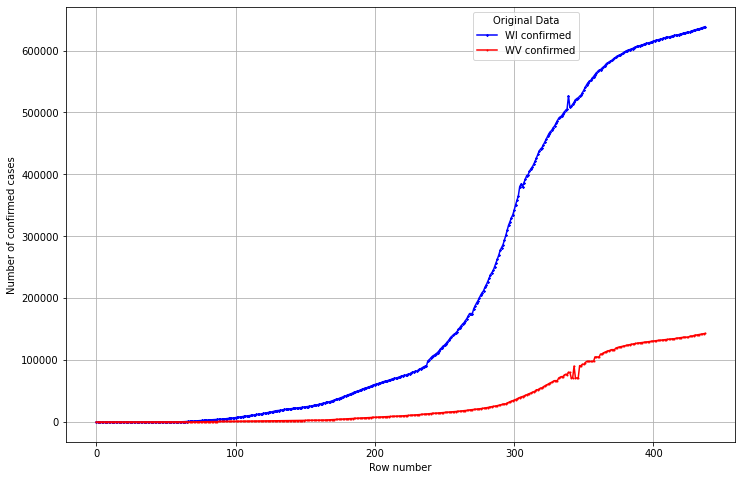

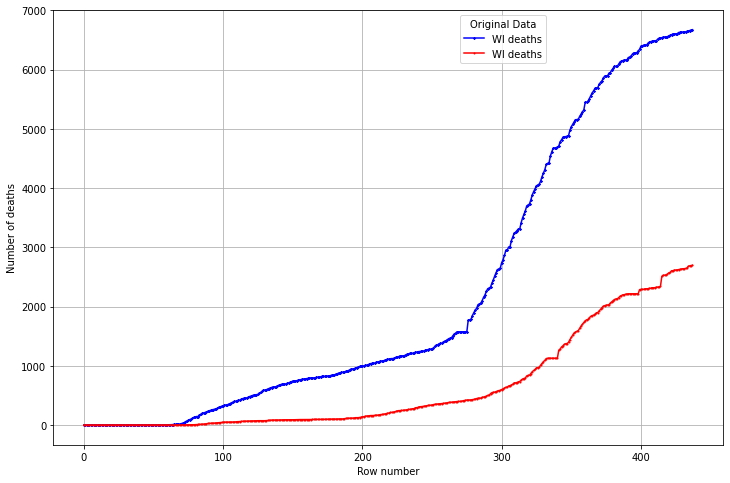

In [ ]:
#################Step 2#################      Plotting the originial data

plt.figure(figsize=(12,8))
p1,=plt.plot(data[State1_confirmed],color='blue',label=State1_confirmed,marker="*",markersize=2)
p2,=plt.plot(data[State2_confirmed],color='Red',label=State2_confirmed,marker=".",markersize=2)
plt.ylabel("Number of confirmed cases")
plt.xlabel("Row number")
plt.legend(handles=[p1,p2], title='Original Data', bbox_to_anchor=(0.6, 1), loc='upper left')
plt.grid()



plt.figure(figsize=(12,8))
p1,=plt.plot(data[State1_deaths],color='blue',label=State1_deaths,marker="*",markersize=2)
p2,=plt.plot(data[State2_deaths],color='Red',label=State1_deaths,marker=".",markersize=2)
plt.ylabel("Number of deaths")
plt.xlabel("Row number")
plt.legend(handles=[p1,p2], title='Original Data', bbox_to_anchor=(0.6, 1), loc='upper left')
plt.grid()




In [ ]:
def handleNegativeCumilativeValues(data):
  states=[State1_confirmed,State2_confirmed,State1_deaths,State2_deaths]
  n=data[states[0]].shape[0]
  
  for m_state in states:
    for i in range(1,n):
      if data[m_state][i]<data[m_state][i-1]:
        data[m_state][i]=data[m_state][i-1]

  return data

In [ ]:
data=handleNegativeCumilativeValues(data)

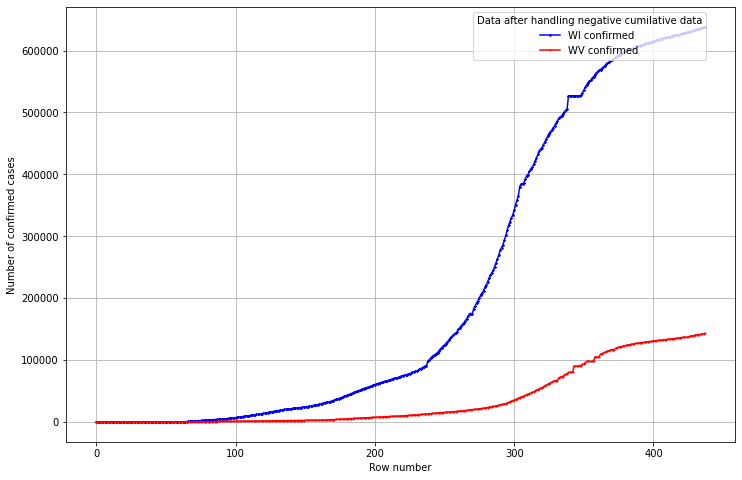

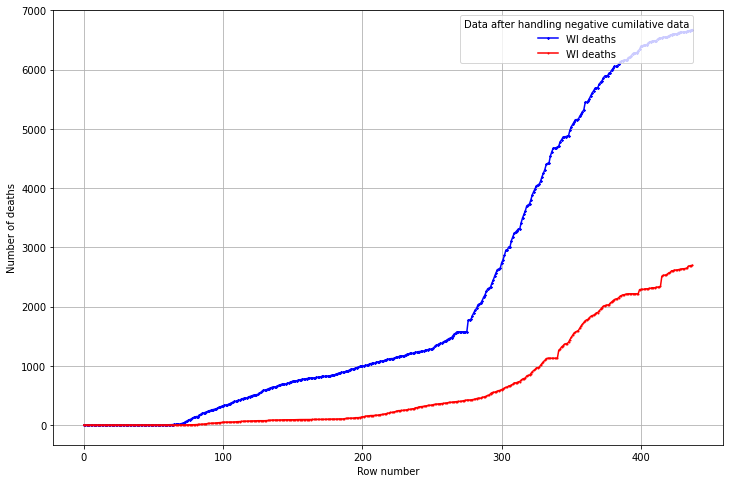

In [ ]:
#   Plotting the data after handling negative cumilative data

plt.figure(figsize=(12,8))
p1,=plt.plot(data[State1_confirmed],color='blue',label=State1_confirmed,marker="*",markersize=2)
p2,=plt.plot(data[State2_confirmed],color='Red',label=State2_confirmed,marker=".",markersize=2)
plt.ylabel("Number of confirmed cases")
plt.xlabel("Row number")
plt.legend(handles=[p1,p2], title='Data after handling negative cumilative data', bbox_to_anchor=(0.6, 1), loc='upper left')
plt.grid()



plt.figure(figsize=(12,8))
p1,=plt.plot(data[State1_deaths],color='blue',label=State1_deaths,marker="*",markersize=2)
p2,=plt.plot(data[State2_deaths],color='Red',label=State1_deaths,marker=".",markersize=2)
plt.ylabel("Number of deaths")
plt.xlabel("Row number")
plt.legend(handles=[p1,p2], title='Data after handling negative cumilative data', bbox_to_anchor=(0.6, 1), loc='upper left')
plt.grid()




In [ ]:
#################Step 3 #################    Converting cumilative data to instantaneous data(daily data)

In [ ]:
def getInstantaneousDataFromCumilative(data):
  states=[State1_confirmed,State2_confirmed,State1_deaths,State2_deaths]
  for m_state in states:
    data[m_state]=data[m_state].diff().fillna(data[m_state])
  return data
  

In [ ]:
data=getInstantaneousDataFromCumilative(data)

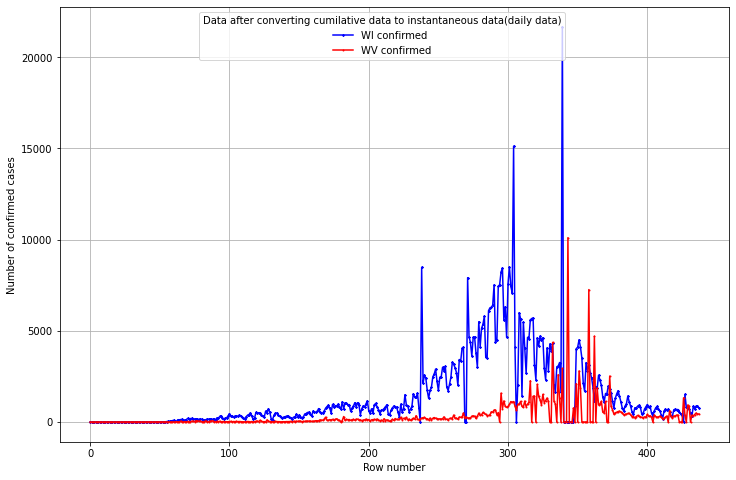

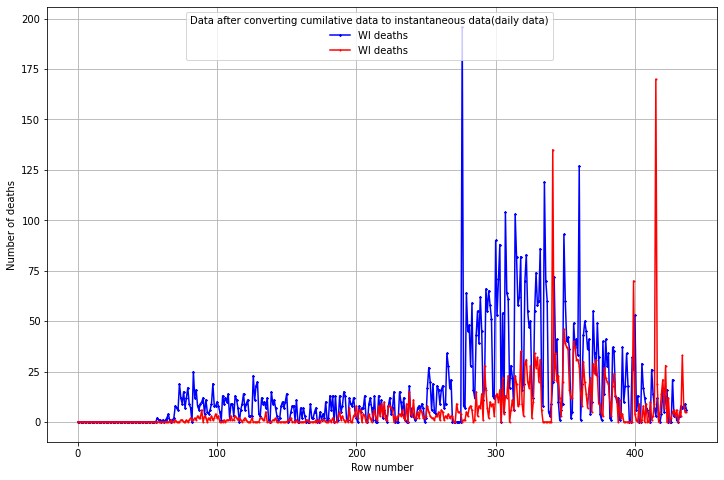

In [ ]:
#   Plotting the data after converting cumilative data to instantaneous data(daily data)

plt.figure(figsize=(12,8))
p1,=plt.plot(data[State1_confirmed],color='blue',label=State1_confirmed,marker="*",markersize=2)
p2,=plt.plot(data[State2_confirmed],color='Red',label=State2_confirmed,marker=".",markersize=2)
plt.ylabel("Number of confirmed cases")
plt.xlabel("Row number")
plt.legend(handles=[p1,p2], title='Data after converting cumilative data to instantaneous data(daily data)', bbox_to_anchor=(0.2, 1), loc='upper left')
plt.grid()



plt.figure(figsize=(12,8))
p1,=plt.plot(data[State1_deaths],color='blue',label=State1_deaths,marker="*",markersize=2)
p2,=plt.plot(data[State2_deaths],color='Red',label=State1_deaths,marker=".",markersize=2)
plt.ylabel("Number of deaths")
plt.xlabel("Row number")
plt.legend(handles=[p1,p2], title='Data after converting cumilative data to instantaneous data(daily data)', bbox_to_anchor=(0.2, 1), loc='upper left')
plt.grid()




In [ ]:
#################Step 4 #################  Applying Tukey Rule for Outlier detection

In [ ]:
def getOutlierIndexesUsingTukeyRule(data):
    
    D=np.sort(data)
    Q1=D[(int)(np.ceil((25/100)*len(D)))-1] 
    Q3=D[(int)(np.ceil((75/100)*len(D)))-1]
    IQR=Q3-Q1

    #Elements are outlier if element E > Q3 + alpha*IQR  OR E < Q1 - alpha*IQR    
    #Using default value of alpha as discussed in the class=1.5
    alpha=1.5
    indexes=[idx for idx,i in enumerate(data) if i> (Q3 + alpha*IQR) or i< (Q1 - alpha*IQR)]

    return indexes

In [ ]:
def checkForZeroValues(state,outlierIndexes):
  indexes=[idx for idx,i in enumerate(data[state].values[outlierIndexes]) if i!=0]
  return indexes

In [ ]:
#Using Tukey's rule for outlier detection

#removing outliers based on each state data
outlierIndexesBasedOnWIconfirmed =getOutlierIndexesUsingTukeyRule(data[State1_confirmed].values)
outlierIndexesBasedOnWVconfirmed =getOutlierIndexesUsingTukeyRule(data[State2_confirmed].values)
outlierIndexesBasedOnWIdeaths =getOutlierIndexesUsingTukeyRule(data[State1_deaths].values)
outlierIndexesBasedOnWVdeaths =getOutlierIndexesUsingTukeyRule(data[State2_deaths].values)


print("Number of Outliers based on ",State1_confirmed," is ",len(outlierIndexesBasedOnWIconfirmed))
print("Number of Outliers based on ",State2_confirmed," is ",len(outlierIndexesBasedOnWVconfirmed))
print("Number of Outliers based on ",State1_deaths," is ",len(outlierIndexesBasedOnWIdeaths))
print("Number of Outliers based on ",State2_deaths," is ",len(outlierIndexesBasedOnWVdeaths))


# Check if the indexes does not correspond to the zero values
print("\n\nNow extracting the outlier indexes which does not corresponds to the zero values \n\n")
print("Number of Outliers based on ",State1_confirmed," is ",len(checkForZeroValues(State1_confirmed,outlierIndexesBasedOnWIconfirmed)))
print("Number of Outliers based on ",State2_confirmed," is ",len(checkForZeroValues(State2_confirmed,outlierIndexesBasedOnWVconfirmed)))
print("Number of Outliers based on ",State1_deaths," is ",len(checkForZeroValues(State1_deaths,outlierIndexesBasedOnWIdeaths)))
print("Number of Outliers based on ",State2_deaths," is ",len(checkForZeroValues(State2_deaths,outlierIndexesBasedOnWVdeaths)))

print("\n####Above suggests that we don't have any outliers which corresponds to zero values####")

Number of Outliers based on  WI confirmed  is  45
Number of Outliers based on  WV confirmed  is  53
Number of Outliers based on  WI deaths  is  59
Number of Outliers based on  WV deaths  is  54


Now extracting the outlier indexes which does not corresponds to the zero values 


Number of Outliers based on  WI confirmed  is  45
Number of Outliers based on  WV confirmed  is  53
Number of Outliers based on  WI deaths  is  59
Number of Outliers based on  WV deaths  is  54

####Above suggests that we don't have any outliers which corresponds to zero values####


In [ ]:
print("#################Printing values which are detected as outliers#################")
print("-------------------------------------")
print("Outlier values based on ",State1_confirmed," are as follows : ")
print("Indexes: ",outlierIndexesBasedOnWIconfirmed)
print("Values: ", data[State1_confirmed].values[outlierIndexesBasedOnWIconfirmed])
print("-------------------------------------")

print("-------------------------------------")
print("Outlier values based on ",State2_confirmed," are as follows : ")
print("Indexes: ",outlierIndexesBasedOnWVconfirmed)
print("Values: ", data[State2_confirmed].values[outlierIndexesBasedOnWVconfirmed])
print("-------------------------------------")

print("-------------------------------------")
print("Outlier values based on ",State1_deaths," are as follows : ")
print("Indexes: ",outlierIndexesBasedOnWIdeaths)
print("Values: ", data[State1_deaths].values[outlierIndexesBasedOnWIdeaths])
print("-------------------------------------")

print("-------------------------------------")
print("Outlier values based on ",State2_deaths," are as follows : ")
print("Indexes: ",outlierIndexesBasedOnWVdeaths)
print("Values: ", data[State2_deaths].values[outlierIndexesBasedOnWVdeaths])
print("-------------------------------------")

#################Printing values which are detected as outliers#################
-------------------------------------
Outlier values based on  WI confirmed  are as follows : 
Indexes:  [238, 271, 272, 273, 275, 276, 279, 281, 282, 283, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 308, 309, 311, 314, 315, 316, 317, 318, 321, 323, 324, 325, 330, 332, 339, 351]
Values:  [ 8484.  7915.  4686.  4363.  4643.  4673.  5500.  5146.  5357.  5808.
  6104.  6256.  6283.  6411.  7521.  4407.  4470.  7432.  7535.  8225.
  8451.  5581.  6320.  4638.  7593.  8510.  7445.  7080. 15124.  5997.
  5665.  5472.  4635.  4565.  5604.  5673.  5711.  4620.  4709.  4478.
  4624.  4281.  4315. 21674.  4509.]
-------------------------------------
-------------------------------------
Outlier values based on  WV confirmed  are as follows : 
Indexes:  [295, 297, 298, 299, 300, 301, 302, 303, 304, 305, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 318, 319, 321,

In [ ]:
OutliersUnionIndexes = set(outlierIndexesBasedOnWIconfirmed).union(set(outlierIndexesBasedOnWVconfirmed), set(outlierIndexesBasedOnWIdeaths),set(outlierIndexesBasedOnWVdeaths))

In [ ]:
len(OutliersUnionIndexes)

107

In [ ]:
print("############## Now removing all the outliers##############")
#Removing the outliers
data.drop(data.index[list(OutliersUnionIndexes)],inplace=True)


############## Now removing all the outliers##############


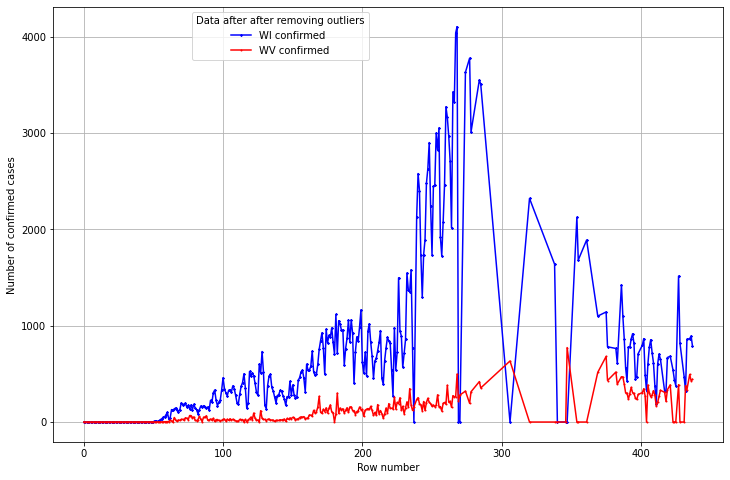

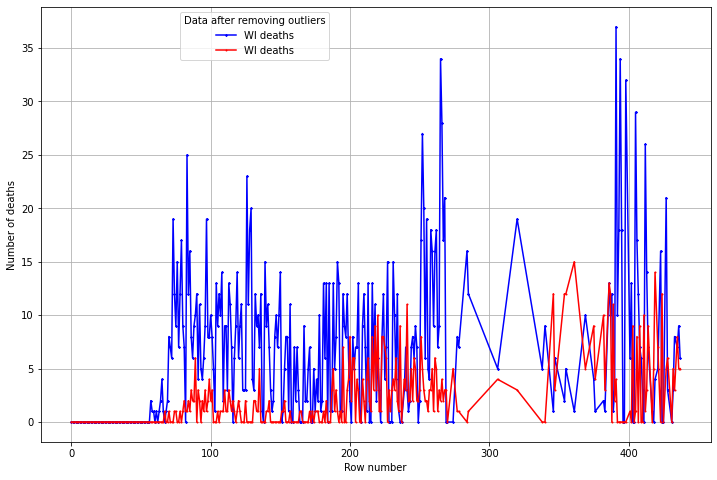

In [ ]:
#   Plotting the data after removing outliers

plt.figure(figsize=(12,8))
p1,=plt.plot(data[State1_confirmed],color='blue',label=State1_confirmed,marker="*",markersize=2)
p2,=plt.plot(data[State2_confirmed],color='Red',label=State2_confirmed,marker=".",markersize=2)
plt.ylabel("Number of confirmed cases")
plt.xlabel("Row number")
plt.legend(handles=[p1,p2], title='Data after after removing outliers', bbox_to_anchor=(0.2, 1), loc='upper left')
plt.grid()



plt.figure(figsize=(12,8))
p1,=plt.plot(data[State1_deaths],color='blue',label=State1_deaths,marker="*",markersize=2)
p2,=plt.plot(data[State2_deaths],color='Red',label=State1_deaths,marker=".",markersize=2)
plt.ylabel("Number of deaths")
plt.xlabel("Row number")
plt.legend(handles=[p1,p2], title='Data after removing outliers', bbox_to_anchor=(0.2, 1), loc='upper left')
plt.grid()




#################### End of Data Cleaning (Ans 1)####################

**QUESTION 2.a**

In this task, we want to predict COVID19 stats for each state. Use the COVID19 dataset to predict the COVID19 fatality and #cases for the fourth week in August 2020 using data from the first three weeks of August 2020. Do this separately for each of the two states. Use the following four prediction techniques: (i) AR(3), (ii) AR(5), (iii) EWMA with alpha = 0.5, and (iv) EWMA with alpha = 0.8. Report the accuracy (MAPE as a % and MSE) of your predictions using the actual fourth week data.


In [ ]:
def MAPE(actual, pred):
    err = np.array([(i[0], i[1]) for i in zip(actual, pred) if i[0] != 0.0])
    actual = err[0]
    pred = err[1]
    mape = np.mean(np.abs((actual - pred)/actual))*100
    return mape

def MSE(actual, pred):
    mse = np.mean((actual - pred)**2)
    return mse

def AR(state, p, state_no, label):

    # (21, (20, 19, 18)) - predict
    # (20, (19, 18, 17)) - training data
    # (19, (18, 17, 16))
    # .....................
    # (3, (2, 1, 0)) 

    actual = august_data[state]

    # preparing initial training data for first 3 weeks
    X_train = []
    Y_train = []
    for i in range(p, 20):
      prev_days = []
      for j in range(p):
          prev_days.append(actual.iloc[i-j-1])

      X_train.append(prev_days[::-1])
      Y_train.append(actual.iloc[i])

    Y_test = []
    Y_pred = []

    # predict for the fourth week using training data from first three weeks
    for y in range(21, 28):
        # Example : predict for y = 22 (since zero indexing, the prediction for 21 corresponds to 22nd day of august)
        # Append previous day data to our training set and calculate weights. 
        # We do this since we need to update weights when we get a new data point

        prev_day = []
        for j in range(p):
          prev_day.append(actual.iloc[y-j-2])

        X_train.append(prev_day[::-1])
        Y_train.append(actual.iloc[y-1])

        # calc weights
        
        train_x = np.array(X_train)
        train_y = np.array(Y_train)

        ones = np.ones(shape = train_x.shape[0]).reshape(-1, 1)
        train_x = np.concatenate((ones, train_x), 1)
        weights = np.linalg.inv(train_x.T.dot(train_x)).dot(train_x.T).dot(train_y)

        # prepare test data i.e last p days
        X_test = []
        for j in range(p):
          X_test.append(actual.iloc[y-j-1])
        X_test.append(1)
        Y_test.append(actual.iloc[y]) # store the actual value for calculating MSE and MAPEs

        X_test = np.array(X_test[::-1]).astype(float)
        Y_pred.append(np.dot(X_test, weights))

    print('AR : with p = {} , MAPE : {}'.format( p, MAPE(np.array(Y_test), np.array(Y_pred))))
    print('AR : with p = {} , MSE : {}'.format( p, MSE(np.array(Y_test), np.array(Y_pred))))
    print()

def EMWA(state, alpha, state_no, label):

    actual = august_data[state]
    pred = []
    for t in range(20, 27):
      y_pred_t = 0
      for i in range(t+1):
        y_pred_t += math.pow((1 - alpha), i) * actual.iloc[t-i]

      y_pred_t = y_pred_t * alpha
      pred.append(y_pred_t)

    print('EWMA with alpha = {} , MAPE : {}'.format(alpha, MAPE(actual[21:28].to_numpy(), np.array(pred))))
    print('EWMA with alpha = {} , MSE : {}'.format( alpha, MSE(actual[21:28].to_numpy(), np.array(pred))))
    print()

#################### INITIALIZE #########################################

august_data = data[(data['Month']==8) & (data['Year']==2020)]

############################### confirmed cases for state 1 ##################################
print('###################  confirmed cases for state 1 ############################ ')
print()
# i AR with p = 3
AR(State1_confirmed, 3, 1, 'cases')

# ii AR with p = 5
AR(State1_confirmed, 5, 1, 'cases')

# iii EMWA with alpha = 0.5
EMWA(State1_confirmed, 0.5, 1, 'cases')

# iv EMWA with alpha = 0.8
EMWA(State1_confirmed, 0.8, 1, 'cases')

################################# deaths for state 1 ##############################
print('###################  deaths for state 1 ############################ ')
print()
# i AR with p = 3
AR(State1_deaths, 3, 1, 'deaths')

# # ii AR with p = 5
AR(State1_deaths, 5, 1, 'deaths')

# iii EMWA with alpha = 0.5 
EMWA(State1_deaths, 0.5, 1, 'deaths')

# iv EMWA with alpha = 0.8
EMWA(State1_deaths, 0.8, 1, 'deaths')

############################### confirmed cases for state 2 ##################################
print('###################  confirmed cases for state 2 ############################ ')
print()
# i AR with p = 3
AR(State2_confirmed, 3, 2, 'cases')

# ii AR with p = 5
AR(State2_confirmed, 5, 2, 'cases')

# iii EMWA with alpha = 0.5
EMWA(State2_confirmed, 0.5, 2, 'cases')

# iv EMWA with alpha = 0.8
EMWA(State2_confirmed, 0.8, 2, 'cases')

################################# deaths for state 2 ##############################
print('###################  deaths for state 1 ############################ ')
print()
# i AR with p = 3
AR(State2_deaths, 3, 2, 'deaths')

# # ii AR with p = 5
AR(State2_deaths, 5, 2, 'deaths')

# iii EMWA with alpha = 0.5 
EMWA(State2_deaths, 0.5, 2, 'deaths')

# iv EMWA with alpha = 0.8
EMWA(State2_deaths, 0.8, 2, 'deaths')

###################  confirmed cases for state 1 ############################ 

AR : with p = 3 , MAPE : 27.53139578548156
AR : with p = 3 , MSE : 34272.44066158218

AR : with p = 5 , MAPE : 27.187420926420913
AR : with p = 5 , MSE : 37719.65106856172

EWMA with alpha = 0.5 , MAPE : 32.45425532083
EWMA with alpha = 0.5 , MSE : 51517.20867454628

EWMA with alpha = 0.8 , MAPE : 33.346071872735926
EWMA with alpha = 0.8 , MSE : 51580.59380203725

###################  deaths for state 1 ############################ 

AR : with p = 3 , MAPE : 36.073985755259166
AR : with p = 3 , MSE : 39.478994322877135

AR : with p = 5 , MAPE : 12.116837272105945
AR : with p = 5 , MSE : 40.26156779683941

EWMA with alpha = 0.5 , MAPE : 25.616730575362368
EWMA with alpha = 0.5 , MSE : 50.40351908433928

EWMA with alpha = 0.8 , MAPE : 40.796178345188636
EWMA with alpha = 0.8 , MSE : 71.12060154357297

###################  confirmed cases for state 2 ############################ 

AR : with p = 3 , MAPE : 40.9

#################### (Ans 2 b)#################### 

----In this step, we want to check, for each state, how the mean of monthly COVID19 stats has changed between Feb 2021 and March 2021---

Summarized Observation:

---------------------------------------------------------------
One Sample Test for State WI confirmed for  March '21

1. One Sample Walds Test => We reject the true hypothesis, i.e Ho not equal to  762.1578947368421
2. One Sample Z Test => We accept the true hypothesis, i.e Ho is equal to  762.1578947368421
3. One Sample T Test => We reject the true hypothesis, i.e Ho not equal to  762.1578947368421



One Sample Test for State WI Deaths for  March '21
1. One Sample Walds Test => We reject the true hypothesis, i.e Ho not equal to  11.105263157894736
2. One Sample Z Test => We reject the true hypothesis, i.e Ho not equal to  11.105263157894736
3. One Sample T Test => We accept the true hypothesis, i.e Ho is equal to  11.105263157894736


One Sample Test for State WV confirmed for  March '21
1. One Sample Walds Test => We reject the true hypothesis, i.e Ho not equal to  340.3157894736842
2. One Sample Z Test => We reject the true hypothesis, i.e Ho not equal to  340.3157894736842
3. One Sample T Test => We reject the true hypothesis, i.e Ho not equal to  340.3157894736842



One Sample Test for State WV Deaths for  March '21
1. One Sample Walds Test => We accept the true hypothesis, i.e Ho is equal to  3.6315789473684212
2. One Sample Z Test => We accept the true hypothesis, i.e Ho is equal to  3.6315789473684212
3. One Sample T Test => We accept the true hypothesis, i.e Ho is equal to  3.6315789473684212
----------------------------------------------------------------

Two population Test for State WI Confirmed for  Feb'21 and March '21
1. Walds=> We reject the true hypothesis, i.e mean of confirmed cases for feb'21 and march'21 is not equal for the state WI
2. Unpaired T-test => We reject the true hypothesis, i.e mean of confirmed cases for feb'21 and march'21 is not equal for the state WI



Two population Test for State WI Deaths for  Feb'21 and March '21
1. Walds=> We reject the true hypothesis, i.e mean of deaths cases for feb'21 and march'21 is not equal for the state WI
2. Unpaired T-test => We accept the true hypothesis, i.e mean of deaths cases for feb'21 and march'21 is equal for the state WI


Two population Test for State WV Confirmed for  Feb'21 and March '21
1. Walds=> We reject the true hypothesis, i.e mean of confirmed cases for feb'21 and march'21 is not equal for the state WV
2. Unpaired T-test => We reject the true hypothesis, i.e mean of confirmed cases for feb'21 and march'21 is not equal for the state WV


Two population Test for State WV Deaths for  Feb'21 and March '21
1. Walds=> We accept the true hypothesis, i.e mean of deaths cases for feb'21 and march'21 is equal for the state WV
2. Unpaired T-test => We accept the true hypothesis, i.e mean of deaths cases for feb'21 and march'21 is equal for the state WV




**Applicability Of Tests**

Wald's Test
=> Assumption of Wald’s test is to have an asymptotic normal estimator but since the number of data points are very small, we can’t even apply CLT. Therefore, the test does not seem to be applicable. Moreover, incase of two population tests, the same rule applies, since we can’t apply CLT, thus the test seems to be not applicable.

Z-test
=> Assumption is to know the true standard deviation which is not the case in our problem. Moreover, since N is very small and also data is not normally distributed, we can’t ideally apply Z test.
 
T-test
=>In one sample, the assumption is that the data should be normally distributed, which is not the case in our problem. Thus, we ideally should not apply a T-test. In unpaired T-test, assumption is that the data should be independent and need to be normally distributed, which again is not the case in our problem. Thus, the test is not applicable.





In [ ]:

#Loading data required for this part of the question

febData2021_WI_confirmed=data[(data['Month']==2) & (data['Year']==2021)][State1_confirmed].values
marchdata2021_WI_confirmed=data[(data['Month']==3) & (data['Year']==2021)][State1_confirmed].values

febData2021_WI_deaths=data[(data['Month']==2) & (data['Year']==2021)][State1_deaths].values
marchdata2021_WI_deaths=data[(data['Month']==3) & (data['Year']==2021)][State1_deaths].values

febData2021_WV_confirmed=data[(data['Month']==2) & (data['Year']==2021)][State2_confirmed].values
marchdata2021_WV_confirmed=data[(data['Month']==3) & (data['Year']==2021)][State2_confirmed].values

febData2021_WV_deaths=data[(data['Month']==2) & (data['Year']==2021)][State2_deaths].values
marchdata2021_WV_deaths=data[(data['Month']==3) & (data['Year']==2021)][State2_deaths].values




In [ ]:
def getcorrectedSanpleStdDeviationForEntireDataset(State):
  d=data[State].values
  return np.sqrt((np.var(d)*(len(d))/(len(d)-1)))

In [ ]:
#One Sample Tests code

#Walds Test (Assuming that the data is Poisson distributed and using MLE as estimator)
def oneSampleWaldsTest(febData,MarchData):
  theta_knot=np.mean(febData)
  theta_hat=np.mean(MarchData)
  se_hat=np.sqrt(theta_hat/len(MarchData)) 
  z=(theta_hat-theta_knot)/(se_hat)
  return z

def oneSampleZtest(febData,MarchData,correctedStd):  
  meu_knot=np.mean(febData)
  x_bar=np.mean(MarchData)
  z=(x_bar-meu_knot)/(correctedStd/np.sqrt(len(MarchData)))
  return z
  
def oneSampleTtest(febData,MarchData,corrected=True):
  x_bar=np.mean(MarchData)
  meu_knot=np.mean(febData)

  if corrected==False:
      Std=np.sqrt((np.var(MarchData)))
  else:
      Std=np.sqrt((np.var(MarchData)*(len(MarchData))/(len(MarchData)-1)))
      
  t=(x_bar-meu_knot)/(Std/np.sqrt(len(MarchData)))
  return t




In [ ]:
print("-------------One Sample Test for State WI confirmed -------------\n")

print("=================== One Sample Walds Test=======================")

Ho=np.mean(febData2021_WI_confirmed)
print("True Hypothesis Ho=",Ho)
print("Alternative Hypothesis H1!=",Ho,"\n")

Wstat=oneSampleWaldsTest(febData2021_WI_confirmed,marchdata2021_WI_confirmed)

Zalphaby2=1.96
print("Value of one Sample Wald's test for the state WI confirmed case is ",Wstat, " and the value of alpha=0.05 and Zalphaby2 is ",Zalphaby2)

if(np.abs(Wstat)>Zalphaby2):
  print("We reject the true hypothesis, i.e Ho not equal to ", Ho)
else:
  print("We accept the true hypothesis, i.e Ho is equal to ", Ho)

print("==============================================================")

print("=================== One Sample Z Test=======================")

Ho=np.mean(febData2021_WI_confirmed)
print("True Hypothesis Ho=",Ho)
print("Alternative Hypothesis H1!=",Ho,"\n")
Zalphaby2=1.96

Zstat=oneSampleZtest(febData2021_WI_confirmed,marchdata2021_WI_confirmed,getcorrectedSanpleStdDeviationForEntireDataset(State1_confirmed))
print("Value of one Sample Zstat test for the state WI confirmed case is ",Zstat, " and the value of alpha=0.05 and Zalphaby2 is ",Zalphaby2)

if(np.abs(Zstat)>Zalphaby2):
  print("We reject the true hypothesis, i.e Ho not equal to ", Ho)
else:
  print("We accept the true hypothesis, i.e Ho is equal to ", Ho)
print("==============================================================")

print("=================== One Sample T Test=======================")

Ho=np.mean(febData2021_WI_confirmed)
print("True Hypothesis Ho=",Ho)
print("Alternative Hypothesis H1!=",Ho,"\n")

print("Here the value of the number of days according to the data is n=",len(febData2021_WI_confirmed))

Tstat=oneSampleTtest(febData2021_WI_confirmed,marchdata2021_WI_confirmed)
tnMinusOneAlphaBy2=2.10 # have used T18,0.025 as n=19 in our case

print("Value of one Sample Tstat test for the state WI confirmed case is ",Tstat, " and the value of alpha=0.05,n-1=19-1=18 and  tn-1,α/2:  t18,0.025 is ",tnMinusOneAlphaBy2)

if(np.abs(Tstat)>tnMinusOneAlphaBy2):
  print("We reject the true hypothesis, i.e Ho not equal to ", Ho)
else:
  print("We accept the true hypothesis, i.e Ho is equal to ", Ho)
print("==============================================================")

print("\n---------------------------------------------------------------")



-------------One Sample Test for State WI confirmed -------------

=================== One Sample Walds Test=======================
True Hypothesis Ho= 762.1578947368421
Alternative Hypothesis H1!= 762.1578947368421 

Value of one Sample Wald's test for the state WI confirmed case is  -32.0389532446399  and the value of alpha=0.05 and Zalphaby2 is  1.96
We reject the true hypothesis, i.e Ho not equal to  762.1578947368421
=================== One Sample Z Test=======================
True Hypothesis Ho= 762.1578947368421
Alternative Hypothesis H1!= 762.1578947368421 

Value of one Sample Zstat test for the state WI confirmed case is  -0.9464924319304641  and the value of alpha=0.05 and Zalphaby2 is  1.96
We accept the true hypothesis, i.e Ho is equal to  762.1578947368421
=================== One Sample T Test=======================
True Hypothesis Ho= 762.1578947368421
Alternative Hypothesis H1!= 762.1578947368421 

Here the value of the number of days according to the data is n= 19
Valu

In [ ]:

print("-------------One Sample Test for State WI Deaths -------------\n")

print("=================== One Sample Walds Test=======================")

Ho=np.mean(febData2021_WI_deaths)
print("True Hypothesis Ho=",Ho)
print("Alternative Hypothesis H1!=",Ho,"\n")

Wstat=oneSampleWaldsTest(febData2021_WI_deaths,marchdata2021_WI_deaths)
Zalphaby2=1.96
print("Value of one Sample Wald's test for the state WI deaths case is ",Wstat, " and the value of alpha=0.05 and Zalphaby2 is ",Zalphaby2)

if(np.abs(Wstat)>Zalphaby2):
  print("We reject the true hypothesis, i.e Ho not equal to ", Ho)
else:
  print("We accept the true hypothesis, i.e Ho is equal to ", Ho)

print("==============================================================")

print("=================== One Sample Z Test=======================")

Ho=np.mean(febData2021_WI_deaths)
print("True Hypothesis Ho=",Ho)
print("Alternative Hypothesis H1!=",Ho,"\n")

Zstat=oneSampleZtest(febData2021_WI_deaths,marchdata2021_WI_deaths,getcorrectedSanpleStdDeviationForEntireDataset(State1_deaths))
print("Value of one Sample Zstat test for the state WI deaths case is ",Zstat, " and the value of alpha=0.05 and Zalphaby2 is ",Zalphaby2)

if(np.abs(Zstat)>Zalphaby2):
  print("We reject the true hypothesis, i.e Ho not equal to ", Ho)
else:
  print("We accept the true hypothesis, i.e Ho is equal to ", Ho)
print("==============================================================")


print("=================== One Sample T Test=======================")

Ho=np.mean(febData2021_WI_deaths)
print("True Hypothesis Ho=",Ho)
print("Alternative Hypothesis H1!=",Ho,"\n")
print("Here the value of the number of days according to the data is n=",len(febData2021_WI_deaths))

Tstat=oneSampleTtest(febData2021_WI_deaths,marchdata2021_WI_deaths)
tnMinusOneAlphaBy2=2.10 # have used T18,0.025 as n=19 in our case


print("Value of one Sample Tstat test for the state WI deaths case is ",Tstat, " and the value of alpha=0.05,n-1=19-1=18 and  tn-1,α/2:  t18,0.025 is ",tnMinusOneAlphaBy2)

if(np.abs(Tstat)>tnMinusOneAlphaBy2):
  print("We reject the true hypothesis, i.e Ho not equal to ", Ho)
else:
  print("We accept the true hypothesis, i.e Ho is equal to ", Ho)
print("==============================================================")

print("\n---------------------------------------------------------------")

-------------One Sample Test for State WI Deaths -------------

=================== One Sample Walds Test=======================
True Hypothesis Ho= 11.105263157894736
Alternative Hypothesis H1!= 11.105263157894736 

Value of one Sample Wald's test for the state WI deaths case is  -5.442330509169664  and the value of alpha=0.05 and Zalphaby2 is  1.96
We reject the true hypothesis, i.e Ho not equal to  11.105263157894736
=================== One Sample Z Test=======================
True Hypothesis Ho= 11.105263157894736
Alternative Hypothesis H1!= 11.105263157894736 

Value of one Sample Zstat test for the state WI deaths case is  -2.210709745634776  and the value of alpha=0.05 and Zalphaby2 is  1.96
We reject the true hypothesis, i.e Ho not equal to  11.105263157894736
=================== One Sample T Test=======================
True Hypothesis Ho= 11.105263157894736
Alternative Hypothesis H1!= 11.105263157894736 

Here the value of the number of days according to the data is n= 19
Valu

In [ ]:

print("-------------One Sample Test for State WV confirmed-------------\n")

print("=================== One Sample Walds Test=======================")

Ho=np.mean(febData2021_WV_confirmed)
print("True Hypothesis Ho=",Ho)
print("Alternative Hypothesis H1!=",Ho,"\n")

Wstat=oneSampleWaldsTest(febData2021_WV_confirmed,marchdata2021_WV_confirmed)
Zalphaby2=1.96
print("Value of one Sample Wald's test for the state WV confirmed case is ",Wstat, " and the value of alpha=0.05 and Zalphaby2 is ",Zalphaby2)

if(np.abs(Wstat)>Zalphaby2):
  print("We reject the true hypothesis, i.e Ho not equal to ", Ho)
else:
  print("We accept the true hypothesis, i.e Ho is equal to ", Ho)

print("==============================================================")

print("=================== One Sample Z Test=======================")

Ho=np.mean(febData2021_WV_confirmed)
print("True Hypothesis Ho=",Ho)
print("Alternative Hypothesis H1!=",Ho,"\n")


Zstat=oneSampleZtest(febData2021_WV_confirmed,marchdata2021_WV_confirmed,getcorrectedSanpleStdDeviationForEntireDataset(State2_confirmed))
print("Value of one Sample Zstat test for the state WV confirmed case is ",Zstat, " and the value of alpha=0.05 and Zalphaby2 is ",Zalphaby2)

if(np.abs(Zstat)>Zalphaby2):
  print("We reject the true hypothesis, i.e Ho not equal to ", Ho)
else:
  print("We accept the true hypothesis, i.e Ho is equal to ", Ho)
print("==============================================================")


print("=================== One Sample T Test=======================")

Ho=np.mean(febData2021_WV_confirmed)
print("True Hypothesis Ho=",Ho)
print("Alternative Hypothesis H1!=",Ho,"\n")
print("Here the value of the number of days according to the data is n=",len(febData2021_WV_confirmed))

Tstat=oneSampleTtest(febData2021_WV_confirmed,marchdata2021_WV_confirmed)
tnMinusOneAlphaBy2=2.10 # have used T18,0.025 as n=19 in our case

print("Value of one Sample Tstat test for the state WV confirmed case is ",Tstat, " and the value of alpha=0.05,n-1=19-1=18 and  tn-1,α/2:  t18,0.025 is ",tnMinusOneAlphaBy2)

if(np.abs(Tstat)>tnMinusOneAlphaBy2):
  print("We reject the true hypothesis, i.e Ho not equal to ", Ho)
else:
  print("We accept the true hypothesis, i.e Ho is equal to ", Ho)
print("==============================================================")

print("\n---------------------------------------------------------------")

-------------One Sample Test for State WV confirmed-------------

=================== One Sample Walds Test=======================
True Hypothesis Ho= 340.3157894736842
Alternative Hypothesis H1!= 340.3157894736842 

Value of one Sample Wald's test for the state WV confirmed case is  -37.359439557187876  and the value of alpha=0.05 and Zalphaby2 is  1.96
We reject the true hypothesis, i.e Ho not equal to  340.3157894736842
=================== One Sample Z Test=======================
True Hypothesis Ho= 340.3157894736842
Alternative Hypothesis H1!= 340.3157894736842 

Value of one Sample Zstat test for the state WV confirmed case is  -4.127797167341269  and the value of alpha=0.05 and Zalphaby2 is  1.96
We reject the true hypothesis, i.e Ho not equal to  340.3157894736842
=================== One Sample T Test=======================
True Hypothesis Ho= 340.3157894736842
Alternative Hypothesis H1!= 340.3157894736842 

Here the value of the number of days according to the data is n= 19
Val

In [ ]:

print("-------------One Sample Test for State WV Deaths -------------\n")

print("=================== One Sample Walds Test=======================")

Ho=np.mean(febData2021_WV_deaths)
print("True Hypothesis Ho=",Ho)
print("Alternative Hypothesis H1!=",Ho,"\n")

Wstat=oneSampleWaldsTest(febData2021_WV_deaths,marchdata2021_WV_deaths)
Zalphaby2=1.96
print("Value of one Sample Wald's test for the state WV deaths case is ",Wstat, " and the value of alpha=0.05 and Zalphaby2 is ",Zalphaby2)

if(np.abs(Wstat)>Zalphaby2):
  print("We reject the true hypothesis, i.e Ho not equal to ", Ho)
else:
  print("We accept the true hypothesis, i.e Ho is equal to ", Ho)

print("==============================================================")

print("=================== One Sample Z Test=======================")


Ho=np.mean(febData2021_WV_deaths)
print("True Hypothesis Ho=",Ho)
print("Alternative Hypothesis H1!=",Ho,"\n")


Zstat=oneSampleZtest(febData2021_WV_deaths,marchdata2021_WV_deaths,getcorrectedSanpleStdDeviationForEntireDataset(State2_deaths))
print("Value of one Sample Zstat test for the state WV deaths case is ",Zstat, " and the value of alpha=0.05 and Zalphaby2 is ",Zalphaby2)

if(np.abs(Zstat)>Zalphaby2):
  print("We reject the true hypothesis, i.e Ho not equal to ", Ho)
else:
  print("We accept the true hypothesis, i.e Ho is equal to ", Ho)
print("==============================================================")


print("=================== One Sample T Test=======================")

Ho=np.mean(febData2021_WV_deaths)
print("True Hypothesis Ho=",Ho)
print("Alternative Hypothesis H1!=",Ho,"\n")
print("Here the value of the number of days according to the data is n=",len(febData2021_WV_deaths))

Tstat=oneSampleTtest(febData2021_WV_deaths,marchdata2021_WV_deaths)
tnMinusOneAlphaBy2=2.10 # have used T18,0.025 as n=19 in our case

print("Value of one Sample Tstat test for the state WV deaths case is ", Tstat, " and the value of alpha=0.05,n-1=19-1=18 and  tn-1,α/2:  t18,0.025 is ",tnMinusOneAlphaBy2)

if(np.abs(Tstat)>tnMinusOneAlphaBy2):
  print("We reject the true hypothesis, i.e Ho not equal to ", Ho)
else:
  print("We accept the true hypothesis, i.e Ho is equal to ", Ho)
print("==============================================================")

print("\n---------------------------------------------------------------")

-------------One Sample Test for State WV Deaths -------------

=================== One Sample Walds Test=======================
True Hypothesis Ho= 3.6315789473684212
Alternative Hypothesis H1!= 3.6315789473684212 

Value of one Sample Wald's test for the state WV deaths case is  1.4620628934308315  and the value of alpha=0.05 and Zalphaby2 is  1.96
We accept the true hypothesis, i.e Ho is equal to  3.6315789473684212
=================== One Sample Z Test=======================
True Hypothesis Ho= 3.6315789473684212
Alternative Hypothesis H1!= 3.6315789473684212 

Value of one Sample Zstat test for the state WV deaths case is  1.0132322753762342  and the value of alpha=0.05 and Zalphaby2 is  1.96
We accept the true hypothesis, i.e Ho is equal to  3.6315789473684212
=================== One Sample T Test=======================
True Hypothesis Ho= 3.6315789473684212
Alternative Hypothesis H1!= 3.6315789473684212 

Here the value of the number of days according to the data is n= 19
Value 

In [ ]:

def waldsTestForTwoPopulation(data1,data2):
  p1=np.mean(data1)
  p2=np.mean(data2)
  delta_hat=p1-p2
  se_hat=np.sqrt((p1/data1.shape[0])+(p2/data2.shape[0]))  
  z=delta_hat/se_hat
  return np.abs(z)


def twoSampleUnpairedT_Test(data1,data2):
  p1=np.mean(data1)
  p2=np.mean(data2)
  delta_hat=p1-p2
  corrvarianceata1=((np.var(data1)*(len(data1))/(len(data1)-1)))
  corrvarianceata2=((np.var(data2)*(len(data2))/(len(data2)-1)))
  denominator=np.sqrt((corrvarianceata1/len(data1)) + (corrvarianceata2/len(data2)))
  T=delta_hat/denominator
  return np.abs(T)


In [ ]:

print("-------------Two population Test for State WI Confirmed for  Feb'21 and March '21-------------\n")

print("=================== Two population test for WALD's Test=======================")

print("Ho=mean of confirmed cases for feb'21 and march'21 is equal for the state WI")
print("H1=mean of confirmed cases for feb'21 and march'21 is not equal for the state WI")


Wstat=waldsTestForTwoPopulation(febData2021_WI_confirmed,marchdata2021_WI_confirmed)
Zalphaby2=1.96

print("Value of Wald's test is ",Wstat, " and the value of alpha=0.05 and Zalphaby2 is ",Zalphaby2)

if(np.abs(Wstat)>Zalphaby2):
  print("We reject the true hypothesis, i.e mean of confirmed cases for feb'21 and march'21 is not equal for the state WI")
else:
  print("We accept the true hypothesis, i.e mean of confirmed cases for feb'21 and march'21 is equal for the state WI")

print("==============================================================")



print("=================== Two population test for T Test=======================")

print("Ho=mean of confirmed cases for feb'21 and march'21 is equal for the state WI")
print("H1=mean of confirmed cases for feb'21 and march'21 is not equal for the state WI")

print("Here the value of the number of days according to the data is m=",len(febData2021_WI_confirmed))
print("Here the value of the number of days according to the data is n=",len(marchdata2021_WI_confirmed))
print("So, m+n-2=40 in our case which has to be used for finding the constant for T test")


Tstat=twoSampleUnpairedT_Test(febData2021_WI_confirmed,marchdata2021_WI_confirmed)
TConst=2.02  # have used T40,0.025 as m=19 n=23 in our case and we have used Tm+n-2,

print("Value of T test stat is ",Tstat, " and the value of alpha=0.05,m+n-2=19+23-2=40 and  tm+n-2,α/2:  t40,0.025 is ",TConst)

if(np.abs(Tstat)>TConst):
  print("We reject the true hypothesis, i.e mean of confirmed cases for feb'21 and march'21 is not equal for the state WI")
else:
  print("We accept the true hypothesis, i.e mean of confirmed cases for feb'21 and march'21 is equal for the state WI")

print("==============================================================")



print("\n---------------------------------------------------------------")


-------------Two population Test for State WI Confirmed for  Feb'21 and March '21-------------

=================== Two population test for WALD's Test=======================
Ho=mean of confirmed cases for feb'21 and march'21 is equal for the state WI
H1=mean of confirmed cases for feb'21 and march'21 is not equal for the state WI
Value of Wald's test is  20.098924509577127  and the value of alpha=0.05 and Zalphaby2 is  1.96
We reject the true hypothesis, i.e mean of confirmed cases for feb'21 and march'21 is not equal for the state WI
=================== Two population test for T Test=======================
Ho=mean of confirmed cases for feb'21 and march'21 is equal for the state WI
H1=mean of confirmed cases for feb'21 and march'21 is not equal for the state WI
Here the value of the number of days according to the data is m= 19
Here the value of the number of days according to the data is n= 23
So, m+n-2=40 in our case which has to be used for finding the constant for T test
Value of

In [ ]:

print("-------------Two population Test for State WI Deaths for  Feb'21 and March '21-------------\n")

print("=================== Two population test for WALD's Test=======================")


print("Ho=mean of deaths cases for feb'21 and march'21 is equal for the state WI")
print("H1=mean of deaths cases for feb'21 and march'21 is not equal for the state WI")

Wstat=waldsTestForTwoPopulation(febData2021_WI_deaths,marchdata2021_WI_deaths)
Zalphaby2=1.96

print("Value of Wald's test is ",Wstat, " and the value of alpha=0.05 and Zalphaby2 is ",Zalphaby2)

if(np.abs(Wstat)>Zalphaby2):
  print("We reject the true hypothesis, i.e mean of deaths cases for feb'21 and march'21 is not equal for the state WI")
else:
  print("We accept the true hypothesis, i.e mean of deaths cases for feb'21 and march'21 is equal for the state WI")


print("==============================================================")



print("=================== Two population test for T Test=======================")


print("Ho=mean of deaths cases for feb'21 and march'21 is equal for the state WI")
print("H1=mean of deaths cases for feb'21 and march'21 is not equal for the state WI")

print("Here the value of the number of days according to the data is m=",len(febData2021_WI_deaths))
print("Here the value of the number of days according to the data is n=",len(marchdata2021_WI_deaths))
print("So, m+n-2=40 in our case which has to be used for finding the constant for T test")

Tstat=twoSampleUnpairedT_Test(febData2021_WI_deaths,marchdata2021_WI_deaths)
TConst=2.02  # have used T40,0.025 as m=19 n=23 in our case and we have used Tm+n-2,

print("Value of T test stat is ",Tstat, " and the value of alpha=0.05,m+n-2=19+23-2=40 and  tm+n-2,α/2:  t40,0.025 is ",TConst)

if(np.abs(Tstat)>TConst):
  print("We reject the true hypothesis, i.e mean of deaths cases for feb'21 and march'21 is not equal for the state WI")
else:
  print("We accept the true hypothesis, i.e mean of deaths cases for feb'21 and march'21 is equal for the state WI")

print("==============================================================")


print("\n---------------------------------------------------------------")


-------------Two population Test for State WI Deaths for  Feb'21 and March '21-------------

=================== Two population test for WALD's Test=======================
Ho=mean of deaths cases for feb'21 and march'21 is equal for the state WI
H1=mean of deaths cases for feb'21 and march'21 is not equal for the state WI
Value of Wald's test is  3.3127916412324874  and the value of alpha=0.05 and Zalphaby2 is  1.96
We reject the true hypothesis, i.e mean of deaths cases for feb'21 and march'21 is not equal for the state WI
=================== Two population test for T Test=======================
Ho=mean of deaths cases for feb'21 and march'21 is equal for the state WI
H1=mean of deaths cases for feb'21 and march'21 is not equal for the state WI
Here the value of the number of days according to the data is m= 19
Here the value of the number of days according to the data is n= 23
So, m+n-2=40 in our case which has to be used for finding the constant for T test
Value of T test stat is  0

In [ ]:

print("-------------Two population Test for State WV Confirmed cases for  Feb'21 and March '21-------------\n")

print("=================== Two population test for WALD's Test=======================")

print("Ho=mean of confirmed cases for feb'21 and march'21 is equal for the state WV")
print("H1=mean of confirmed cases for feb'21 and march'21 is not equal for the state WV")

Wstat=waldsTestForTwoPopulation(febData2021_WV_confirmed,marchdata2021_WV_confirmed)
Zalphaby2=1.96

print("Value of Wald's test is ",Wstat, " and the value of alpha=0.05 and Zalphaby2 is ",Zalphaby2)

if(np.abs(Wstat)>Zalphaby2):
  print("We reject the true hypothesis, i.e mean of confirmed cases for feb'21 and march'21 is not equal for the state WV")
else:
  print("We accept the true hypothesis, i.e mean of confirmed cases for feb'21 and march'21 is equal for the state WV")


print("==============================================================")



print("=================== Two population test for T Test=======================")


print("Ho=mean of confirmed cases for feb'21 and march'21 is equal for the state WV")
print("H1=mean of confirmed cases for feb'21 and march'21 is not equal for the state WV")

print("Here the value of the number of days according to the data is m=",len(febData2021_WV_confirmed))
print("Here the value of the number of days according to the data is n=",len(marchdata2021_WV_confirmed))
print("So, m+n-2=40 in our case which has to be used for finding the constant for T test")

Tstat=twoSampleUnpairedT_Test(febData2021_WV_confirmed,marchdata2021_WV_confirmed)
TConst=2.02  # have used T40,0.025 as m=19 n=23 in our case and we have used Tm+n-2,

print("Value of T test stat is ",Tstat, " and the value of alpha=0.05,m+n-2=19+23-2=40 and  tm+n-2,α/2:  t40,0.025 is ",TConst)

if(np.abs(Tstat)>TConst):
  print("We reject the true hypothesis, i.e mean of confirmed cases for feb'21 and march'21 is not equal for the state WV")
else:
  print("We accept the true hypothesis, i.e mean of confirmed cases for feb'21 and march'21 is equal for the state WV")

print("==============================================================")


print("\n---------------------------------------------------------------")

-------------Two population Test for State WV Confirmed cases for  Feb'21 and March '21-------------

=================== Two population test for WALD's Test=======================
Ho=mean of confirmed cases for feb'21 and march'21 is equal for the state WV
H1=mean of confirmed cases for feb'21 and march'21 is not equal for the state WV
Value of Wald's test is  22.16524022815722  and the value of alpha=0.05 and Zalphaby2 is  1.96
We reject the true hypothesis, i.e mean of confirmed cases for feb'21 and march'21 is not equal for the state WV
=================== Two population test for T Test=======================
Ho=mean of confirmed cases for feb'21 and march'21 is equal for the state WV
H1=mean of confirmed cases for feb'21 and march'21 is not equal for the state WV
Here the value of the number of days according to the data is m= 19
Here the value of the number of days according to the data is n= 23
So, m+n-2=40 in our case which has to be used for finding the constant for T test
Val

In [ ]:

print("-------------Two population Test for State WV Deaths for  Feb'21 and March '21-------------\n")

print("=================== Two population test for WALD's Test=======================")


print("Ho=mean of deaths cases for feb'21 and march'21 is equal for the state WV")
print("H1=mean of deaths cases for feb'21 and march'21 is not equal for the state WV")

Wstat=waldsTestForTwoPopulation(febData2021_WV_deaths,marchdata2021_WV_deaths)
Zalphaby2=1.96

print("Value of Wald's test is ",Wstat, " and the value of alpha=0.05 and Zalphaby2 is ",Zalphaby2)

if(np.abs(Wstat)>Zalphaby2):
  print("We reject the true hypothesis, i.e mean of deaths cases for feb'21 and march'21 is equal for the state WV")
else:
  print("We accept the true hypothesis, i.e mean of deaths cases for feb'21 and march'21 is equal for the state WV")




print("=================== Two population test for T Test=======================")



print("Ho=mean of deaths cases for feb'21 and march'21 is equal for the state WV")
print("H1=mean of deaths cases for feb'21 and march'21 is not equal for the state WV")

print("Here the value of the number of days according to the data is m=",len(febData2021_WV_deaths))
print("Here the value of the number of days according to the data is n=",len(marchdata2021_WV_deaths))
print("So, m+n-2=40 in our case which has to be used for finding the constant for T test")

Tstat=twoSampleUnpairedT_Test(febData2021_WV_deaths,marchdata2021_WV_deaths)
TConst=2.02  # have used T40,0.025 as m=19 n=23 in our case and we have used Tm+n-2,

print("Value of T test stat is ",Tstat, " and the value of alpha=0.05,m+n-2=19+23-2=40 and  tm+n-2,α/2:  t40,0.025 is ",TConst)

if(np.abs(Tstat)>TConst):
  print("We reject the true hypothesis, i.e mean of deaths cases for feb'21 and march'21 is equal for the state WV")
else:
  print("We accept the true hypothesis, i.e mean of deaths cases for feb'21 and march'21 is equal for the state WV")

print("==============================================================")


print("\n---------------------------------------------------------------")

-------------Two population Test for State WV Deaths for  Feb'21 and March '21-------------

=================== Two population test for WALD's Test=======================
Ho=mean of deaths cases for feb'21 and march'21 is equal for the state WV
H1=mean of deaths cases for feb'21 and march'21 is not equal for the state WV
Value of Wald's test is  1.0257267474997702  and the value of alpha=0.05 and Zalphaby2 is  1.96
We accept the true hypothesis, i.e mean of deaths cases for feb'21 and march'21 is equal for the state WV
=================== Two population test for T Test=======================
Ho=mean of deaths cases for feb'21 and march'21 is equal for the state WV
H1=mean of deaths cases for feb'21 and march'21 is not equal for the state WV
Here the value of the number of days according to the data is m= 19
Here the value of the number of days according to the data is n= 23
So, m+n-2=40 in our case which has to be used for finding the constant for T test
Value of T test stat is  0.439

#################### END (Ans 2 b)#################### 


==========================================#Ans 2 C)=============================================================

Summarized Observation:

**One Sample K-S Test for WI_confirmed and WV_confirmed**

----------------------------Poisson------------------------------

Ho:  WI_confirmed  distribution is equivalent to  WV_confirmed  distribution incase when the given distribution is  Poisson

H1:  WI_confirmed  distribution is not equivalent to  WV_confirmed  distribution incase when the given distribution is  Poisson

Poisson  :  maximum difference val  1.0

Rejecting the Hypothesis,i.e WI_confirmed  distribution is not equivalent to  WV_confirmed  distribution incase when the given distribution is  Poisson 

----------------------------Geometric------------------------------

Ho:  WI_confirmed  distribution is equivalent to  WV_confirmed  distribution incase when the given distribution is  Geometric

H1:  WI_confirmed  distribution is not equivalent to  WV_confirmed  distribution incase when the given distribution is  Geometric

Geometric  :  maximum difference val  0.7824226825633314

Rejecting the Hypothesis,i.e WI_confirmed  distribution is not equivalent to  WV_confirmed  distribution incase when the given distribution is  Geometric 

-----------------------------Binomial----------------------------

Ho:  WI_confirmed  distribution is equivalent to  WV_confirmed  distribution incase when the given distribution is  Binomial

H1:  WI_confirmed  distribution is not equivalent to  WV_confirmed  distribution incase when the given distribution is  Binomial

Binomial  :  maximum difference val  1.0

Rejecting the Hypothesis,i.e WI_confirmed  distribution is not equivalent to  WV_confirmed  distribution incase when the given distribution is  Binomial 


**One Sample K-S Test for WI_deaths and WV_deaths**

-----------------------------Poisson-----------------------------

Ho:  WI_deaths  distribution is equivalent to  WV_deaths  distribution incase when the given distribution is  Poisson

H1:  WI_deaths  distribution is not equivalent to  WV_deaths  distribution incase when the given distribution is  Poisson

Poisson  :  maximum difference val  0.957815730505644

Rejecting the Hypothesis,i.e WI_deaths  distribution is not equivalent to  WV_deaths  distribution incase when the given distribution is  Poisson 
------------------------------Geometric----------------------------

Ho:  WI_deaths  distribution is equivalent to  WV_deaths  distribution incase when the given distribution is  Geometric

H1:  WI_deaths  distribution is not equivalent to  WV_deaths  distribution incase when the given distribution is  Geometric

Geometric  :  maximum difference val  0.6137865128870058

Rejecting the Hypothesis,i.e WI_deaths  distribution is not equivalent to  WV_deaths  distribution incase when the given distribution is  Geometric 
------------------------------Binomial----------------------------

Ho:  WI_deaths  distribution is equivalent to  WV_deaths  distribution incase when the given distribution is  Binomial

H1:  WI_deaths  distribution is not equivalent to  WV_deaths  distribution incase when the given distribution is  Binomial

Binomial  :  maximum difference val  1.0

Rejecting the Hypothesis,i.e WI_deaths  distribution is not equivalent to  WV_deaths  distribution incase when the given distribution is  Binomial 


**Two Sample K-S Test**

-------------------------For WI_deaths and WV_deaths---------------------


Ho:  WI_deaths  distribution is equivalent to  WV_deaths  distribution

H1:  WI_deaths  distribution is not equivalent to  WV_deaths  distribution

maximum difference val  0.7037037037037037

Rejecting the Hypothesis,i.e WI_deaths  distribution is not equivalent to  WV_deaths  distribution

-------------------------For WI_confirmed and WV_confirmed--------------------


Ho:  WI_confirmed  distribution is equivalent to  WV_confirmed  distribution

H1:  WI_confirmed  distribution is not equivalent to  WV_confirmed  distribution

maximum difference val  0.8518518518518519

Rejecting the Hypothesis,i.e WI_confirmed  distribution is not equivalent to  WV_confirmed  distribution


**Permutation Test**

--------------------For WI_deaths and WV_deaths---------------------


Ho:  WI_deaths  distribution is equivalent to  WV_deaths  distribution

H1:  WI_deaths  distribution is not equivalent to  WV_deaths  distribution

Tobs: 9.777777777777779

Pval is :  0.0

Rejecting the Hypothesis,i.e WI_deaths  distribution is not equivalent to  WV_deaths  distribution


-------------------------For WI_confirmed and WV_confirmed--------------------


Ho:  WI_confirmed  distribution is equivalent to  WV_confirmed  distribution

H1:  WI_confirmed  distribution is not equivalent to  WV_confirmed  distribution

Tobs: 2262.0

Pval is :  0.0

Rejecting the Hypothesis,i.e WI_confirmed  distribution is not equivalent to  WV_confirmed  distribution


In [ ]:
# Loading data for this part of the question
octData2020_WI_confirmed=data[(data['Month']==10) & (data['Year']==2020)][State1_confirmed].values
novData2020_WI_confirmed=data[(data['Month']==11) & (data['Year']==2020)][State1_confirmed].values
decData2020_WI_confirmed=data[(data['Month']==12) & (data['Year']==2020)][State1_confirmed].values
total_WI_confirmed=np.insert(octData2020_WI_confirmed,octData2020_WI_confirmed.shape[0],novData2020_WI_confirmed)
total_WI_confirmed=np.insert(total_WI_confirmed,total_WI_confirmed.shape[0],decData2020_WI_confirmed)


octData2020_WI_deaths=data[(data['Month']==10) & (data['Year']==2020)][State1_deaths].values
novData2020_WI_deaths=data[(data['Month']==11) & (data['Year']==2020)][State1_deaths].values
decData2020_WI_deaths=data[(data['Month']==12) & (data['Year']==2020)][State1_deaths].values
total_WI_deaths=np.insert(octData2020_WI_deaths,octData2020_WI_deaths.shape[0],novData2020_WI_deaths)
total_WI_deaths=np.insert(total_WI_deaths,total_WI_deaths.shape[0],decData2020_WI_deaths)


octData2020_WV_confirmed=data[(data['Month']==10) & (data['Year']==2020)][State2_confirmed].values
novData2020_WV_confirmed=data[(data['Month']==11) & (data['Year']==2020)][State2_confirmed].values
decData2020_WV_confirmed=data[(data['Month']==12) & (data['Year']==2020)][State2_confirmed].values
total_WV_confirmed=np.insert(octData2020_WV_confirmed,octData2020_WV_confirmed.shape[0],novData2020_WV_confirmed)
total_WV_confirmed=np.insert(total_WV_confirmed,total_WV_confirmed.shape[0],decData2020_WV_confirmed)


octData2020_WV_deaths=data[(data['Month']==10) & (data['Year']==2020)][State2_deaths].values
novData2020_WV_deaths=data[(data['Month']==11) & (data['Year']==2020)][State2_deaths].values
decData2020_WV_deaths=data[(data['Month']==12) & (data['Year']==2020)][State2_deaths].values
total_WV_deaths=np.insert(octData2020_WV_deaths,octData2020_WV_deaths.shape[0],novData2020_WV_deaths)
total_WV_deaths=np.insert(total_WV_deaths,total_WV_deaths.shape[0],decData2020_WV_deaths)


In [ ]:
#one sample KS test with Poisson, Geometric, and Binomial for both the states and for both cases,i.e confirmed and deaths cases
from scipy.stats import poisson,geom,binom

def ks_test(firstStateData,secondStateData,dist,state1,state2):

    print("Ho: ",state1 ," distribution is equivalent to ",state2 ," distribution incase when the given distribution is ",dist)
    print("H1: ",state1 ," distribution is not equivalent to ",state2 ," distribution incase when the given distribution is ",dist)

    threshold=0.05
    x=np.sort(secondStateData)

    if dist=="Poisson":
        lambdaMME=np.mean(firstStateData)
        fyx= [poisson.cdf(a, lambdaMME) for a in x]

    if dist=="Geometric":
        pMME=1/np.mean(firstStateData)
        fyx= [geom.cdf(a, pMME) for a in x]

    if dist=="Binomial":
        mean=np.mean(firstStateData)
        SummationXiSquareByN=sum([a*a for a in firstStateData])/len(firstStateData)
        pMME=1-((SummationXiSquareByN-(mean*mean))/mean)
        nMME=(int)(mean/pMME)
        fyx= [binom.cdf(a, nMME, pMME) for a in x]


    
    fx_minus=[ i/len(x) for i in range(len(x))]
    fx_plus=[ i/len(x) for i in range(1,len(x)+1)]
    fx_minus_fyx_diff_abs=[abs(fx_minus[i]-fyx[i]) for i in range(len(x))]
    fx_plus_fyx_diff_abs=[abs(fx_plus[i]-fyx[i]) for i in range(len(x))]

    maxDiff=max(fx_minus_fyx_diff_abs+fx_plus_fyx_diff_abs)
    print(dist," : ","maximum difference val ",maxDiff )
    if(maxDiff>threshold):
      print("Rejecting the Hypothesis,i.e",state1, " distribution is not equivalent to ",state2 ," distribution incase when the given distribution is ",dist,"\n\n")
    else:
      print("Accepting the Hypothesis,i.e",state1, " distribution is equivalent to ",state2 ," distribution incase when the given distribution is ",dist,"\n\n")
    
    return (pd.DataFrame({'x':x,'fyx':fyx,'fx_minus':fx_minus,'fx_plus':fx_plus,'fx_minus_fyx_diff_abs':fx_minus_fyx_diff_abs,'fx_plus_fyx_diff_abs':fx_plus_fyx_diff_abs}))             



def ecdf(a,thresh):
    ans=sum([1 for i in a if i<thresh])/len(a)
    return ans

def ks_test_two_population(firstStateData,secondStateData,state1,state2):

    print("Ho: ",state1 ," distribution is equivalent to ",state2 ," distribution")
    print("H1: ",state1 ," distribution is not equivalent to ",state2 ," distribution")

    threshold=0.05
    data1=np.sort(firstStateData)
    data2=np.sort(secondStateData)
    
    if(len(data1)<=len(data2)):
      d2=data1
      d1=data2
    elif(len(data2)<len(data1)):  
      d1=data1
      d2=data2
    
    x=d2
    y=d1
    
    fd1x=[ecdf(y,i) for i in x]
    
    fd2x_minus=[ i/len(x) for i in range(len(x))]
    fd2x_plus=[ i/len(x) for i in range(1,len(x)+1)]

    fd1x_minus_fd2x_minus_diff_abs=[abs(fd2x_minus[i]-fd1x[i]) for i in range(len(x))]
    fd1x_minus_fd2x_plus_diff_abs=[abs(fd2x_plus[i]-fd1x[i]) for i in range(len(x))]

    maxDiff=max(fd1x_minus_fd2x_minus_diff_abs+fd1x_minus_fd2x_plus_diff_abs)
    print("maximum difference val ",maxDiff )
    if(maxDiff>threshold):
      print("Rejecting the Hypothesis,i.e",state1, " distribution is not equivalent to ",state2 ," distribution\n\n")
    else:
      print("Accepting the Hypothesis,i.e",state1, " distribution is equivalent to ",state2 ," distribution\n\n")
    
    
    return (pd.DataFrame({'x':x,'fd1x':fd1x,'fd2x_minus':fd2x_minus,'fd2x_plus':fd2x_plus,'fd1x_minus_fd2x_minus_diff_abs':fd1x_minus_fd2x_minus_diff_abs,'fd1x_minus_fd2x_plus_diff_abs':fd1x_minus_fd2x_plus_diff_abs}))             



In [ ]:
print("################One Sample K-S Test for WI_confirmed and WV_confirmed################\n")
print("\n\n----------------------------Poisson------------------------------\n\n")
print(ks_test(total_WI_confirmed,total_WV_confirmed,"Poisson","WI_confirmed","WV_confirmed"))
print("\n\n----------------------------Geometric------------------------------\n\n")
print(ks_test(total_WI_confirmed,total_WV_confirmed,"Geometric","WI_confirmed","WV_confirmed"))
print("\n\n-----------------------------Binomial----------------------------\n\n")
print(ks_test(total_WI_confirmed,total_WV_confirmed,"Binomial","WI_confirmed","WV_confirmed"))
print("\n\n\----------------------------------------------------------\n\n")


################One Sample K-S Test for WI_confirmed and WV_confirmed################



----------------------------Poisson------------------------------


Ho:  WI_confirmed  distribution is equivalent to  WV_confirmed  distribution incase when the given distribution is  Poisson
H1:  WI_confirmed  distribution is not equivalent to  WV_confirmed  distribution incase when the given distribution is  Poisson
Poisson  :  maximum difference val  1.0
Rejecting the Hypothesis,i.e WI_confirmed  distribution is not equivalent to  WV_confirmed  distribution incase when the given distribution is  Poisson 


        x  fyx  fx_minus   fx_plus  fx_minus_fyx_diff_abs  fx_plus_fyx_diff_abs
0     0.0  0.0  0.000000  0.037037               0.000000              0.037037
1     0.0  0.0  0.037037  0.074074               0.037037              0.074074
2     0.0  0.0  0.074074  0.111111               0.074074              0.111111
3   114.0  0.0  0.111111  0.148148               0.111111              0.148

In [ ]:
print("################One Sample K-S Test for WI_deaths and WV_deaths################\n")
print("-----------------------------Poisson-----------------------------\n\n")
print(ks_test(total_WI_deaths,total_WV_deaths,"Poisson","WI_deaths","WV_deaths"))
print("------------------------------Geometric----------------------------\n\n")
print(ks_test(total_WI_deaths,total_WV_deaths,"Geometric","WI_deaths","WV_deaths"))
print("------------------------------Binomial----------------------------\n\n")
print(ks_test(total_WI_deaths,total_WV_deaths,"Binomial","WI_deaths","WV_deaths"))
print("----------------------------------------------------------\n\n")


################One Sample K-S Test for WI_deaths and WV_deaths################

-----------------------------Poisson-----------------------------


Ho:  WI_deaths  distribution is equivalent to  WV_deaths  distribution incase when the given distribution is  Poisson
H1:  WI_deaths  distribution is not equivalent to  WV_deaths  distribution incase when the given distribution is  Poisson
Poisson  :  maximum difference val  0.957815730505644
Rejecting the Hypothesis,i.e WI_deaths  distribution is not equivalent to  WV_deaths  distribution incase when the given distribution is  Poisson 


      x       fyx  ...  fx_minus_fyx_diff_abs  fx_plus_fyx_diff_abs
0   0.0  0.000005  ...               0.000005              0.037032
1   0.0  0.000005  ...               0.037032              0.074069
2   0.0  0.000005  ...               0.074069              0.111106
3   0.0  0.000005  ...               0.111106              0.148143
4   1.0  0.000070  ...               0.148078              0.185116


In [ ]:
print("################Two Sample K-S Test ################\n")

print("-------------------------For WI_deaths and WV_deaths---------------------------------\n\n")
print(ks_test_two_population(total_WI_deaths,total_WV_deaths,"WI_deaths","WV_deaths"))
print("-------------------------For WI_confirmed and WV_confirmed---------------------------------\n\n")
print(ks_test_two_population(total_WI_confirmed,total_WV_confirmed,"WI_confirmed","WV_confirmed"))
print("----------------------------------------------------------\n\n")

################Two Sample K-S Test ################

-------------------------For WI_deaths and WV_deaths---------------------------------


Ho:  WI_deaths  distribution is equivalent to  WV_deaths  distribution
H1:  WI_deaths  distribution is not equivalent to  WV_deaths  distribution
maximum difference val  0.7037037037037037
Rejecting the Hypothesis,i.e WI_deaths  distribution is not equivalent to  WV_deaths  distribution


       x  ...  fd1x_minus_fd2x_plus_diff_abs
0    0.0  ...                       0.037037
1    0.0  ...                       0.074074
2    0.0  ...                       0.111111
3    4.0  ...                       0.629630
4    5.0  ...                       0.666667
5    5.0  ...                       0.629630
6    5.0  ...                       0.592593
7    6.0  ...                       0.666667
8    7.0  ...                       0.666667
9    7.0  ...                       0.629630
10   8.0  ...                       0.592593
11   9.0  ...               

In [ ]:

def returnKpermutations(data,k):
  
  m_data=data.copy()

  returnList=[]
  for i in range(k):
    idx=np.random.permutation(len(m_data))
   
    append_list=[m_data[m_idx] for m_idx in idx]
    returnList.append(append_list)
  return returnList
  
def permutation_test(data1,data2,state1,state2,k=1000):

    threshold=0.05
    print("Ho: ",state1 ," distribution is equivalent to ",state2 ," distribution")
    print("H1: ",state1 ," distribution is not equivalent to ",state2 ," distribution")

  
    n=len(data1)+len(data2)
    Tobs=abs(np.mean(data1)-np.mean(data2))
    print("Tobs:",Tobs)
    permutations=returnKpermutations(list(np.insert(data1,data1.shape[0],data2)),k)
    
    
    Separate_permutations=[(i[:-len(data2)],i[-len(data2):]) for i in permutations]
    
    Ti=[abs(np.mean(list(j[0]))-np.mean(list(j[1]))) for i,j in enumerate(Separate_permutations)]
    TiGreaterThanTobs=[1 if i>Tobs else 0 for i in Ti ]

    returnval=pd.DataFrame({'Ti':Ti,"TiGreaterThanTobs":TiGreaterThanTobs}) 
    pval=sum(returnval['TiGreaterThanTobs'])/len(returnval['TiGreaterThanTobs'])

    print("Pval is : ",pval)
    if(pval<threshold):
      print("Rejecting the Hypothesis,i.e",state1, " distribution is not equivalent to ",state2 ," distribution\n\n")
    else:
      print("Accepting the Hypothesis,i.e",state1, " distribution is equivalent to ",state2 ," distribution\n\n")
    
    return returnval,pval
    

In [ ]:
print("################permutation_test ################\n")

print("--------------------For WI_deaths and WV_deaths------------------------------------\n\n")
table,pval=permutation_test(total_WI_deaths,total_WV_deaths,"WI_deaths","WV_deaths")
print(table)


print("----------------------------------------------------------\n\n")


print("-------------------------For WI_confirmed and WV_confirmed---------------------------------\n\n")
table,pval=permutation_test(total_WI_confirmed,total_WV_confirmed,"WI_confirmed","WV_confirmed")
print(table)

#note print the result whether it is rejected or not and also check if it is correct
print("----------------------------------------------------------\n\n")


################permutation_test ################

--------------------For WI_deaths and WV_deaths------------------------------------


Ho:  WI_deaths  distribution is equivalent to  WV_deaths  distribution
H1:  WI_deaths  distribution is not equivalent to  WV_deaths  distribution
Tobs: 9.777777777777779
Pval is :  0.0
Rejecting the Hypothesis,i.e WI_deaths  distribution is not equivalent to  WV_deaths  distribution


           Ti  TiGreaterThanTobs
0    2.000000                  0
1    0.296296                  0
2    2.666667                  0
3    0.888889                  0
4    0.814815                  0
..        ...                ...
995  1.111111                  0
996  0.296296                  0
997  3.259259                  0
998  0.296296                  0
999  0.518519                  0

[1000 rows x 2 columns]
----------------------------------------------------------


-------------------------For WI_confirmed and WV_confirmed---------------------------------


H

=======================================================================================================

==========================================#Ans 2 D)=============================================================

In [ ]:
# =======================================================================================================
# 2D

In [ ]:
data_june = data[((data['Month']==6) | (data['Month']==7)) & (data['Year']==2020)] #shreyas, use some other variable for this otherwise, data variable is modified
data_june

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(data_june)

,Date,WI confirmed,WV confirmed,WI deaths,WV deaths,Month,Year
131,2020-06-01,138.0,14.0,3.0,2.0,6,2020
132,2020-06-02,379.0,27.0,12.0,2.0,6,2020
133,2020-06-03,477.0,30.0,9.0,1.0,6,2020
134,2020-06-04,495.0,22.0,10.0,1.0,6,2020
135,2020-06-05,359.0,20.0,7.0,5.0,6,2020
...,...,...,...,...,...,...,...
187,2020-07-27,590.0,94.0,1.0,3.0,7,2020
188,2020-07-28,762.0,120.0,13.0,5.0,7,2020
189,2020-07-29,870.0,148.0,5.0,1.0,7,2020
190,2020-07-30,1059.0,101.0,8.0,3.0,7,2020


We are given that the combined daily deaths and cases follow poisson distribution with parameter lambda and the prior is exponential distribution on lambda with mean beta.

We derive the posterior distribution by finding likelihood and prior from first 4 weeks data. The posterior comes out as the gamma distribution which then we plot. Please find below the derivation for finding the posterior

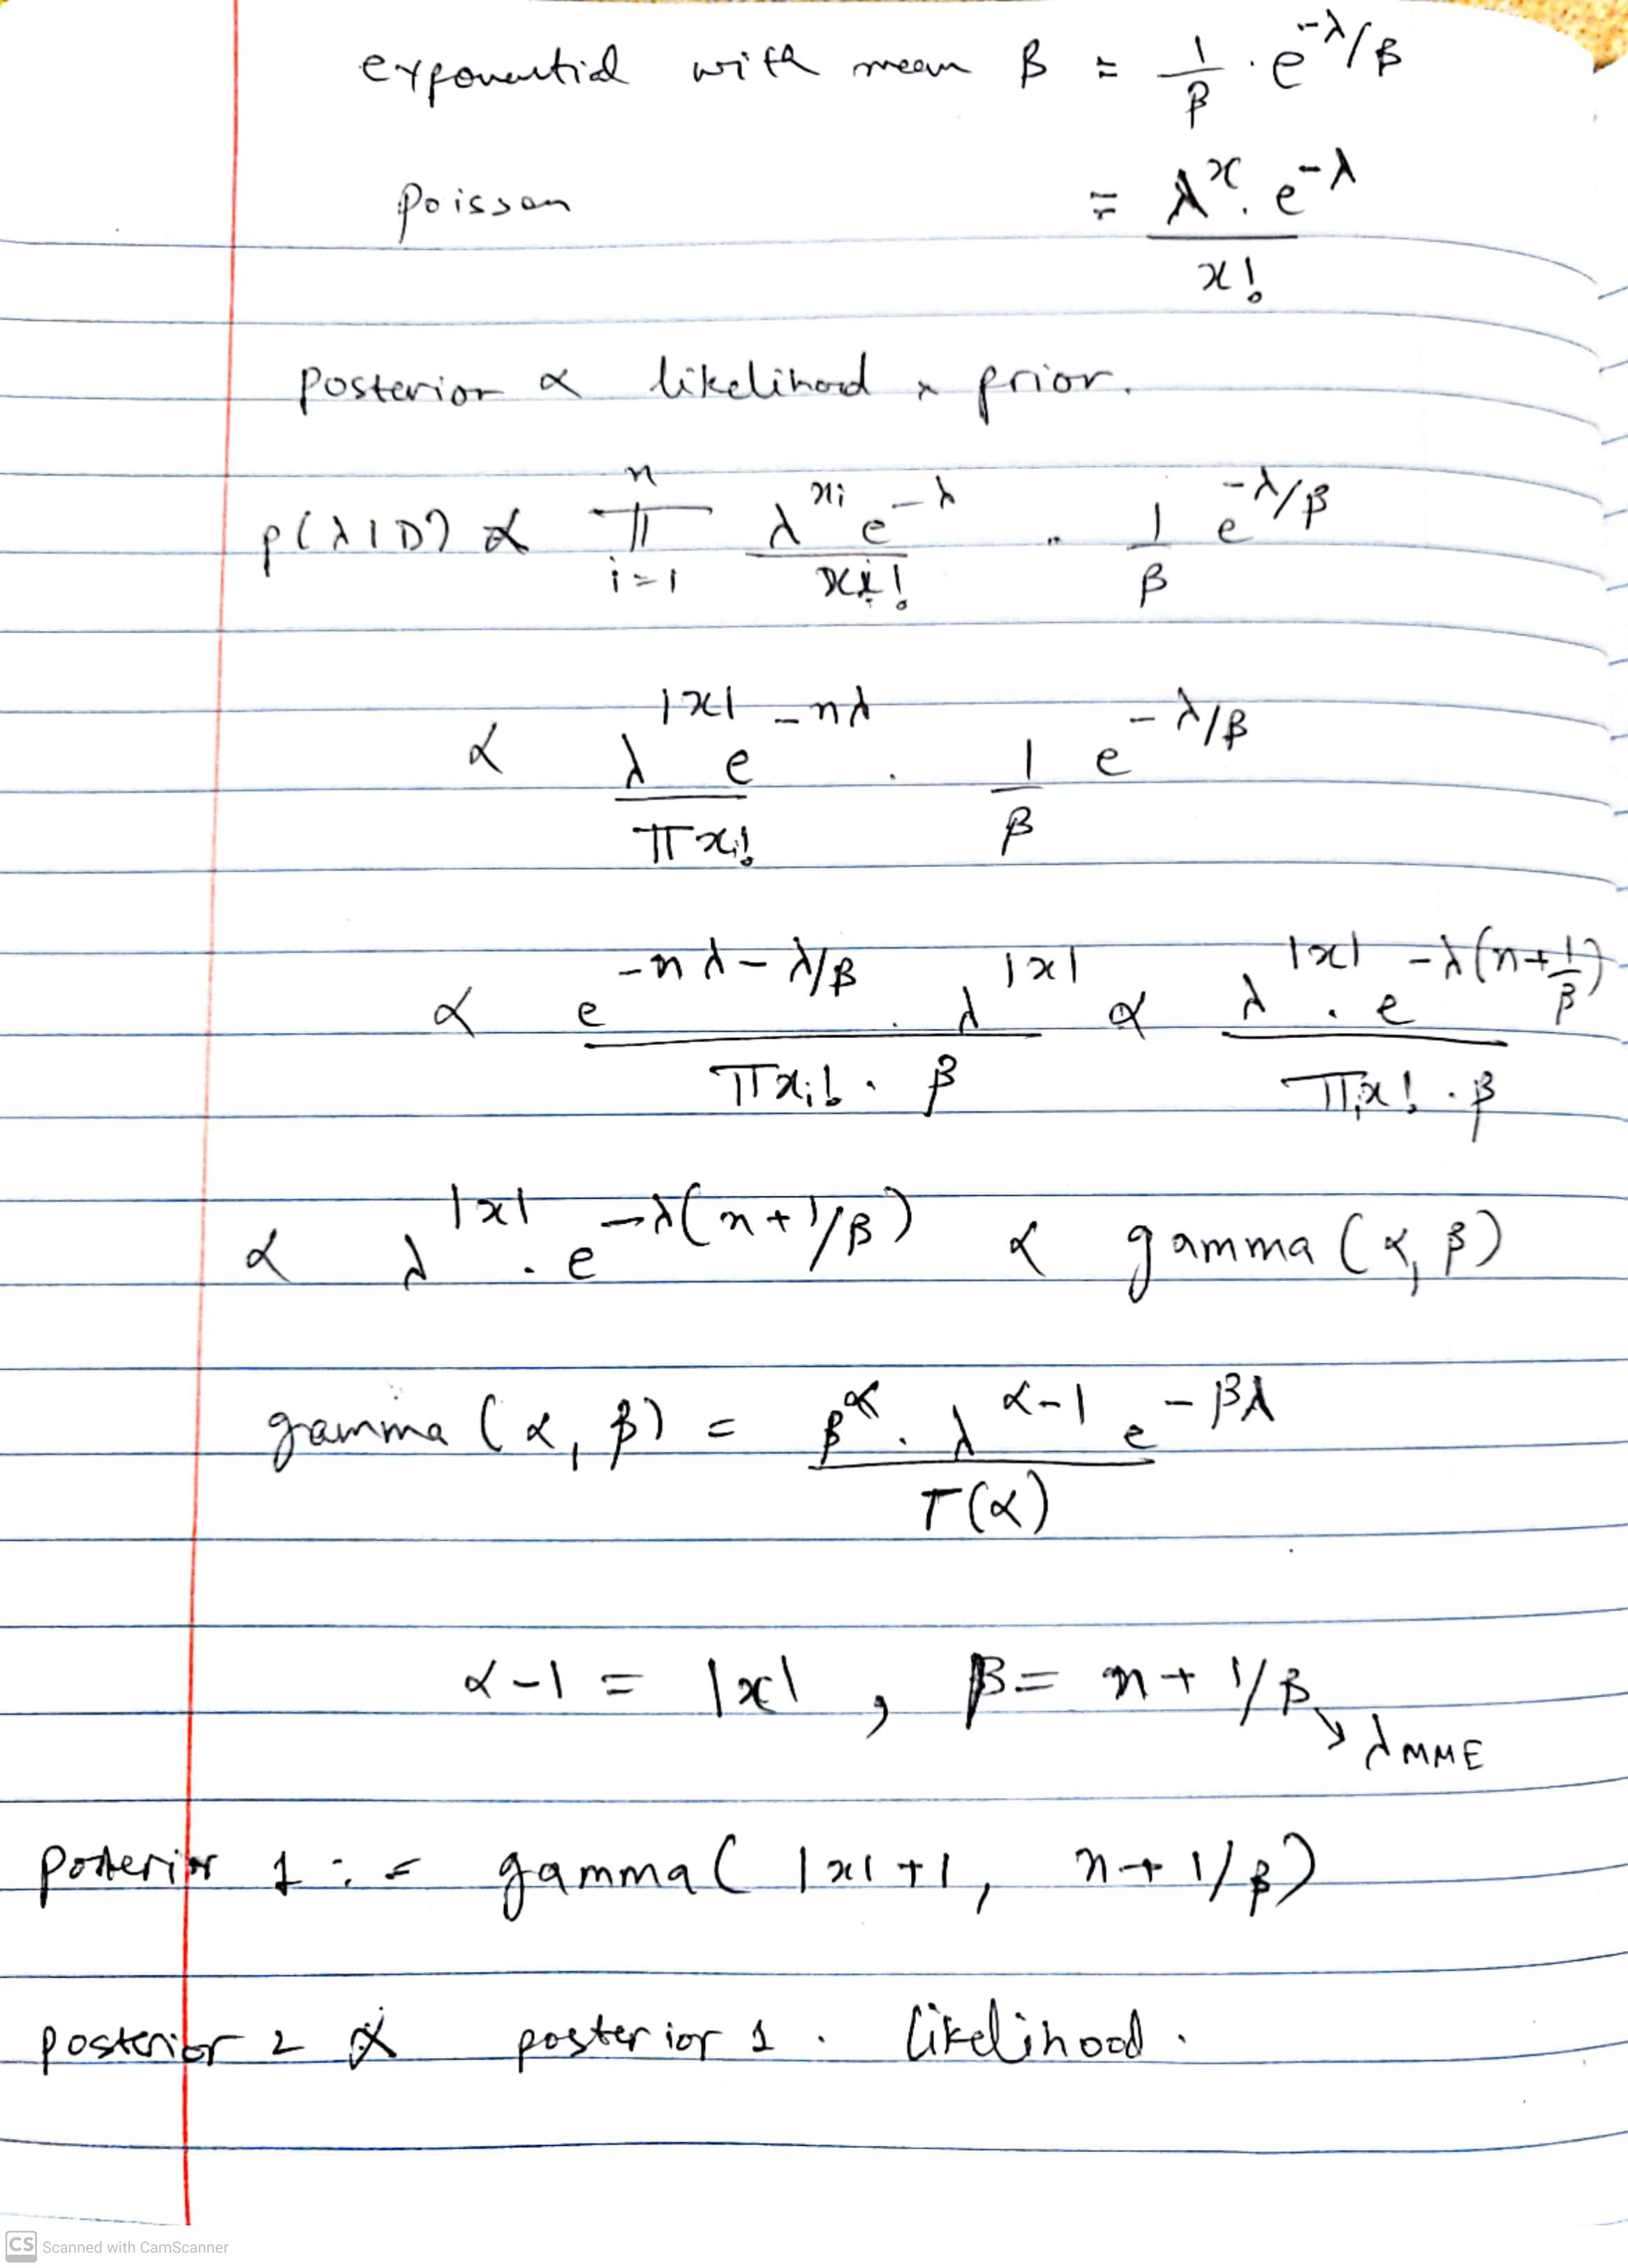

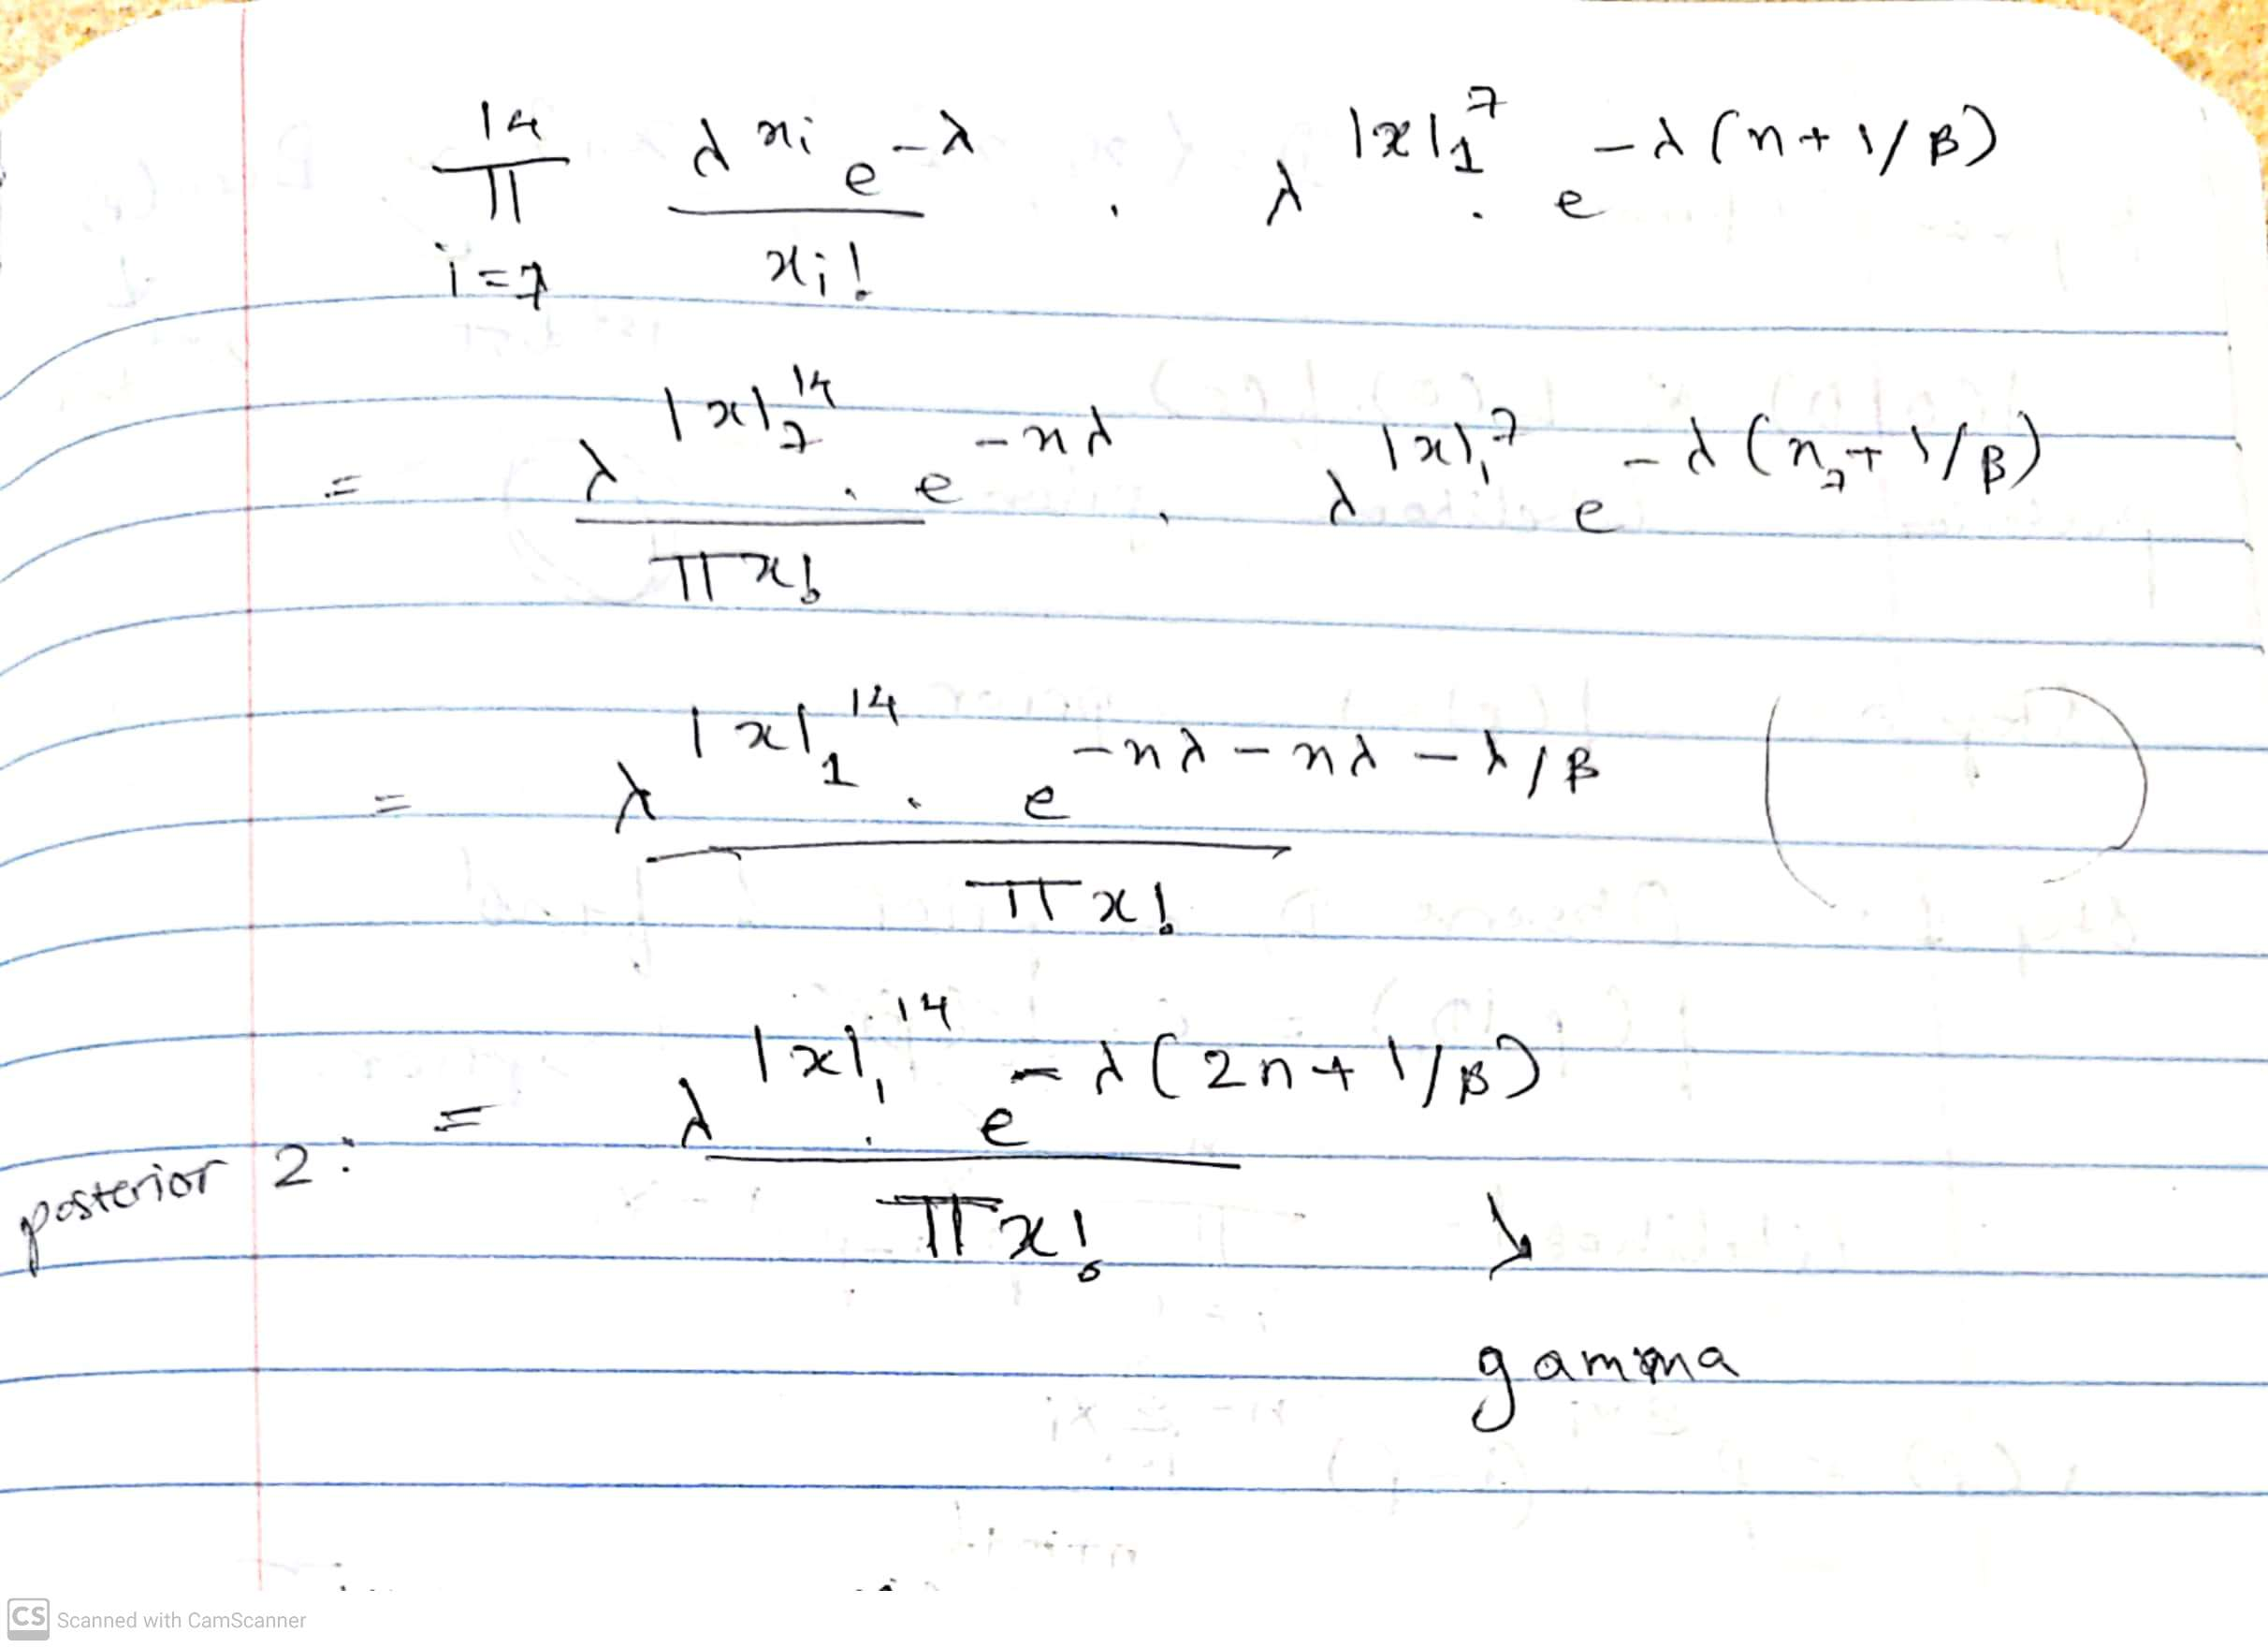

Week : 1 , MAP : 611.0282338198889
Week : 2 , MAP : 720.9222144870828
Week : 3 , MAP : 801.5496825799343
Week : 4 , MAP : 865.1267993553181


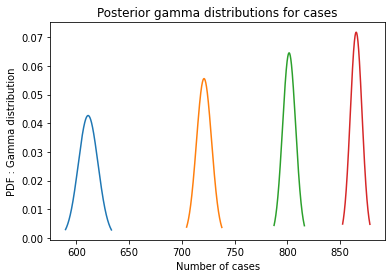


________________________________________________________________________

Week : 1 , MAP : 2.923680827509256
Week : 2 , MAP : 3.335989317260387
Week : 3 , MAP : 3.490901084514456
Week : 4 , MAP : 4.442268958336296



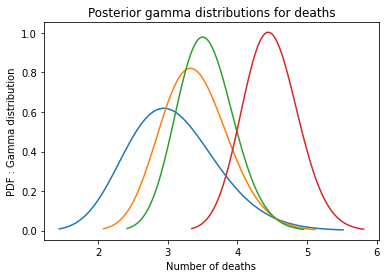

In [ ]:
cases = data_june[State1_confirmed] + data_june[State2_confirmed]
deaths = data_june[State1_deaths] + data_june[State2_deaths]

# for cases 
lambda_mme = np.mean(cases.iloc[:28])
beta = lambda_mme

week = 7
n = 28

for i in range(4):

  alpha = np.sum(cases.iloc[n:n + (i+1)*week]) + 1
  scale = 1.0 / ((i+1)*week + 1.0/beta)
  x = np.linspace(scipy.stats.gamma.ppf(0.01, alpha, scale=scale),
                        scipy.stats.gamma.ppf(0.99, alpha, scale=scale), 1000)
  pdf = scipy.stats.gamma.pdf(x, a=alpha, scale=scale)
  print('Week :', str(i+1), ', MAP :', x[np.argmax(pdf)])
  plt.plot(x, pdf)
  plt.title("Posterior gamma distributions for cases")
  plt.xlabel("Number of cases")
  plt.ylabel("PDF : Gamma distribution")
plt.show()
print()
print('________________________________________________________________________')
print()

######################## DEATHS ####################################

# for deaths 
lambda_mme = np.mean(deaths.iloc[:28])
beta = lambda_mme

week = 7
n = 28

for i in range(4):

  alpha = np.sum(deaths.iloc[n:n + (i+1)*week]) + 1
  scale = 1.0 / ((i+1)*week + 1.0/beta)
  x = np.linspace(scipy.stats.gamma.ppf(0.001, alpha, scale=scale),
                        scipy.stats.gamma.ppf(0.999, alpha, scale=scale), 100)
  pdf = scipy.stats.gamma.pdf(x, a=alpha, scale=scale)
  print('Week :', str(i+1), ', MAP :', x[np.argmax(pdf)])
  
  plt.title("Posterior gamma distributions for deaths")
  plt.plot(x, pdf, label = 'a')
  plt.xlabel("Number of deaths")
  plt.ylabel("PDF : Gamma distribution")
print()